# 数据集构造
## 解压文件夹
```Linux
rar x fileName.rar
```

## 切割图片

In [26]:
from PIL import Image
import numpy as np
import glob
import shutil
inum = 1
def CuttingImg(imgfile,outdir):
    global inum
    img = Image.open(imgfile)
    w,h=img.size
    gray = img.convert('L')
    npimg=np.array(gray)
    histg=npimg.sum(axis=0)
    
    ctpoint=SegPoint(histg,4)
    if inum==1 or inum==12:
        shutil.copy(imgfile,"/home/xys/VirtualEnvs/PyTorch/Projects/DSOD/DataSet/void")
        print(inum)
        print(ctpoint)
        
    for ip in range(len(ctpoint)-1):   
        box=(ctpoint[ip],0,ctpoint[ip+1],h)
        new_img = img.crop(box)
        new_img.save(outdir+'%07d'%(inum)+".bmp")
        inum += 1        

def SegPoint(array,gate):
    start = 0 
    Flag = 0
    length = len(array)
    point=[]
    length-=1
    i=0  
    for index,key in enumerate(array):
        if key <= gate and Flag == 1:
            start = index
            Flag = 0
        if (key >= gate or index == length) and Flag ==0:  #是边界还是新的果子开始？
            if index == length:                            #是边界就计算果子结束到边界中心点位置
                point.append((start+index)//2)
                Flag = 1
                i +=1
            elif array[index+1]>gate:                      #是果子开始并且下个像素也是果子（保证连续性）
                point.append((start+index)//2)             #就计算上个果子结束到这个果子开始中心点位置
                Flag = 1
                i +=1
    return point
        
for imgfile in glob.glob("/home/xys/VirtualEnvs/PyTorch/Projects/DSOD/DataSet/src/*.bmp"):
    CuttingImg(imgfile,"/home/xys/VirtualEnvs/PyTorch/Projects/DSOD/DataSet/cut/")

1
[10, 192, 374, 556, 734, 912, 1090, 1268, 1447, 1628, 1812, 1995]
12
[10, 172, 334, 498, 656, 814, 972, 1132, 1294, 1452, 1612, 1776]


### 切割图片（修改文件命名方式）

In [3]:
from PIL import Image
import numpy as np
import glob
import shutil
import os

def CuttingImg(imgfile,outdir):
    global inum
    img = Image.open(imgfile)
    w,h=img.size
    gray = img.convert('L')
    npimg=np.array(gray)
    histg=npimg.sum(axis=0)
    
    ctpoint=SegPoint(histg,1)
  
    inum = 1
    mainame, _ = os.path.splitext(os.path.basename(imgfile))
    for ip in range(len(ctpoint)-1):   
        box=(ctpoint[ip],0,ctpoint[ip+1],h)
        new_img = img.crop(box)
        new_img.save(outdir+'%06d%03d'%(int(mainame),inum)+".bmp")
        inum += 1        

def SegPoint(array,gate):
    start = 0 
    Flag = 0
    length = len(array)
    point=[]
    length-=1
    i=0  
    for index,key in enumerate(array):
        if key <= gate and Flag == 1:
            start = index
            Flag = 0
        if (key >= gate or index == length) and Flag ==0:  #是边界还是新的果子开始？
            if index == length:                            #是边界就计算果子结束到边界中心点位置
                point.append((start+index)//2)
                Flag = 1
                i +=1
            elif array[index+1]>gate:                      #是果子开始并且下个像素也是果子（保证连续性）
                point.append((start+index)//2)             #就计算上个果子结束到这个果子开始中心点位置
                Flag = 1
                i +=1
    return point
        
for imgfile in glob.glob("/home/xys/VirtualEnvs/PyTorch/Projects/DSOD/DataSet/src/*.bmp"):
    CuttingImg(imgfile,"/home/xys/VirtualEnvs/PyTorch/Projects/DSOD/DataSet/cut/")

## 压缩图片
```Linux
zip -r Cut ./cut
```

## VOC转txt

In [39]:
import xml.etree.ElementTree as ET
import pickle
import os
import glob
from os import listdir, getcwd
from os.path import join
 
classes = ["top","bottom"]
txtpath = "/home/xys/VirtualEnvs/PyTorch/Projects/DSOD/DataSet/"
 
def convert_annotation(image_id):
    in_file = open('%s'%(image_id))       
    
    tree=ET.parse(in_file)
    root = tree.getroot()
    filename = root.find('filename').text
    #size = root.find('size')  
    #w = int(size.find('width').text)
    #h = int(size.find('height').text)
    Flag=1    
 
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes :
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')   
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        if Flag==1:
            with open(os.path.join(txtpath, 'Tag.txt'), 'a') as f:
                f.write('%s'%filename)
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))
            Flag=0
        else:
            with open(os.path.join(txtpath, 'Tag.txt'), 'a') as f:
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))                
    if Flag==0:
        with open(os.path.join(txtpath, 'Tag.txt'), 'a') as f:
            f.write('\n')
        
for imgfile in glob.glob("/home/xys/VirtualEnvs/PyTorch/Projects/DSOD/DataSet/tag/*.xml"):
        convert_annotation(imgfile)


### 详细分类数据集txt

In [2]:
import xml.etree.ElementTree as ET
import pickle
import os
import glob
from os import listdir, getcwd
from os.path import join
 
classes = ["top1","top2","botton1","botton2","botbad","bad"]
txtpath = "/media/newdata2/xys/DataSet/Orange/TagDoc/"
TxtName = 'Tag2.txt'
 
def convert_annotation(image_id):
    in_file = open('%s'%(image_id))       
    
    tree=ET.parse(in_file)
    root = tree.getroot()
    filename = root.find('filename').text
    #size = root.find('size')  
    #w = int(size.find('width').text)
    #h = int(size.find('height').text)
    Flag=1    
 
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes :
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')   
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        if Flag==1:
            with open(os.path.join(txtpath, TxtName), 'a') as f:  #Change 【Name】
                f.write('%s'%filename)
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))
            Flag=0
        else:
            with open(os.path.join(txtpath, TxtName), 'a') as f:
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))                
    if Flag==0:
        with open(os.path.join(txtpath, TxtName), 'a') as f:
            f.write('\n')
        
for imgfile in glob.glob("/media/newdata2/xys/DataSet/Orange/tag2/*.xml"):
        convert_annotation(imgfile)

### 雨亭的数据集


In [3]:
import xml.etree.ElementTree as ET
import pickle
import os
import glob
from os import listdir, getcwd
from os.path import join
 
classes = ["top","bottom","ulcer"]
txtpath = "/media/newdata2/xys/DataSet/OrangebyYL/TagDoc/"
TxtName = 'Tag1.txt'
 
def convert_annotation(image_id):
    in_file = open('%s'%(image_id))       
    
    tree=ET.parse(in_file)
    root = tree.getroot()
    filename = root.find('filename').text
    #size = root.find('size')  
    #w = int(size.find('width').text)
    #h = int(size.find('height').text)
    Flag=1    
 
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes :
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')   
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        if Flag==1:
            with open(os.path.join(txtpath, TxtName), 'a') as f:  #Change 【Name】
                f.write('%s.jpg'%filename)
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))
            Flag=0
        else:
            with open(os.path.join(txtpath, TxtName), 'a') as f:
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))                
    if Flag==0:
        with open(os.path.join(txtpath, TxtName), 'a') as f:
            f.write('\n')
        
for imgfile in glob.glob("/media/newdata2/xys/DataSet/OrangebyYL/Annotations/*.xml"):
        convert_annotation(imgfile)

## 分离数据集

In [21]:
import random
import os

OrgName ="Tag1.txt"
TestName ="TagTest.txt"
TrainName ="TagTrain.txt"
path = "/media/newdata2/xys/DataSet/OrangebyYL/TagDoc"
ratio = 0.3 # for test

f = open(os.path.join(path, OrgName))
lines = f.readlines()
random.shuffle(lines)

length = len(lines)
segpoint = int(ratio*length)
linestest = lines[:segpoint]
linestrain = lines[segpoint:]

print(len(linestest),len(linestrain))   
print(len(linestest)/length,len(linestrain)/length)

with open(os.path.join(path, TestName), 'a') as f1:
    f1.writelines(linestest)
with open(os.path.join(path, TrainName), 'a') as f2:
    f2.writelines(linestrain)

586 1370
0.2995910020449898 0.7004089979550102


## 数据集统计
### 提取信息

In [2]:
import os

OrgName ="Tag1.txt"
path = "/media/newdata2/xys/DataSet/OrangebyYL/TagDoc"
f = open(os.path.join(path, OrgName))
lines = f.readlines()

fnames = []
boxes = []
labels = []

W = []
H = []

for line in lines:
    splited = line.strip().split()
    fnames.append(splited[0])
    num_boxes = (len(splited) - 1) // 5
    box = []
    label = []
    for i in range(num_boxes):
        xmin = splited[1+5*i]
        ymin = splited[2+5*i]
        xmax = splited[3+5*i]
        ymax = splited[4+5*i]
        c = splited[5+5*i]
        box.append([float(xmin),float(ymin),float(xmax),float(ymax)])
        label.append(int(c))
        W.append(float(xmax)-float(xmin))
        H.append(float(ymax)-float(ymin))
    boxes.append(torch.Tensor(box))
    labels.append(torch.LongTensor(label))

print(len(fnames),len(boxes),len(labels))
print(len(W),len(H))

1956 1956 1956
2888 2888


In [5]:
import numpy as np

nH = np.array(H)
a=nH<30
print(a.sum(),a.sum()/len(nH)*100,'%')

nW = np.array(W)
a=nW<30
print(a.sum(),a.sum()/len(nW)*100,'%')

nS=nH*nW
Sr=nS/(300*300)
b=nS<900
print(len(nS),len(nH),len(Sr))
print(b.sum(),b.sum()/len(nS)*100,'%')

nR=nH/nW
print(len(nS))
#print(nR.index(0))

1259 43.594182825484765 %
906 31.371191135734072 %
2888 2888 2888
1095 37.915512465373965 %
2888


* 提取长宽信息：(雨亭数据集之前已经resize过了，所以没必要再搞了)

In [3]:
import xml.etree.ElementTree as ET
import pickle
import os
import glob
from os import listdir, getcwd
from os.path import join
 
classes = ["top","bottom","ulcer"]
sizeW = []
sizeH = [] 

def get_WH(image_id):
    in_file = open('%s'%(image_id))       
    global sizeW
    global sizeH
    tree=ET.parse(in_file)
    root = tree.getroot()
    filename = root.find('filename').text
    size = root.find('size')  
    w = int(size.find('width').text)
    h = int(size.find('height').text)
    i=0
 
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes :
            continue
        i=i+1
    for t in range(i):
        sizeW.append(int(w))
        sizeH.append(int(h))
    
        
for imgfile in glob.glob("/media/newdata2/xys/DataSet/OrangebyYL/Annotations/*.xml"):
        get_WH(imgfile)

In [8]:
print(len(sizeW),len(sizeH))
#print(sizeW)

2888 2888


### 绘制图像

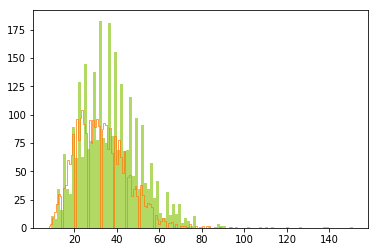

Statistics about W：
	Mean： 37.52319944598338
	Std： 14.562698117695996
	Min： 9
	Max： 151
Statistics about H：
	Mean： 32.745152354570635
	Std： 12.104611426005052
	Min： 8
	Max： 94


In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(W,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.hist(H,100,density=0,histtype='step',facecolor='pink',alpha=0.75)
plt.show()

print("Statistics about W：")
print("\tMean：",np.array(W).mean())
print("\tStd：",np.array(W).std())
print("\tMin：",int(np.array(W).min()))
print("\tMax：",int(np.array(W).max()))

print("Statistics about H：")
print("\tMean：",np.array(H).mean())
print("\tStd：",np.array(H).std())
print("\tMin：",int(np.array(H).min()))
print("\tMax：",int(np.array(H).max()))

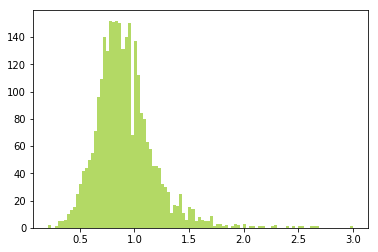

Statistics about nR：
	Mean： 0.9142800356231974
	Std： 0.27375962469027637
	Min： 0
	Max： 3


In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(nR,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about nR：")
print("\tMean：",np.array(nR).mean())
print("\tStd：",np.array(nR).std())
print("\tMin：",int(np.array(nR).min()))
print("\tMax：",int(np.array(nR).max()))

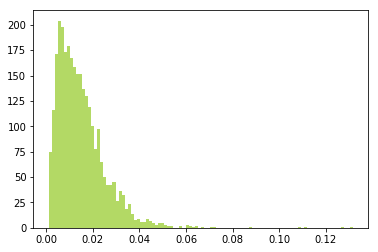

Statistics about Sr：
	Mean： 0.014997537703908896
	Std： 0.01077656482279016
	Min： 0.0010666666666666667
	Max： 0.1316


In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(Sr,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about Sr：")
print("\tMean：",np.array(Sr).mean())
print("\tStd：",np.array(Sr).std())
print("\tMin：",np.array(Sr).min())
print("\tMax：",np.array(Sr).max())

## 我的数据集2
重新调整了数据集中一些图像的分类和标注。标签在tag3文件夹中。转换出的文件为tag4.txt文件

### VOC转换为txt

In [11]:
import xml.etree.ElementTree as ET
import pickle
import os
import glob
from os import listdir, getcwd
from os.path import join
 
classes = ["top1","top2","botton1","botton2","botbad","bad"]
txtpath = "/media/newdata2/xys/DataSet/Orange/TagDoc/"
TxtName = 'Tag4.txt'
sizeW = []
sizeH = [] 
 
def convert_annotation(image_id):
    in_file = open('%s'%(image_id))       
    
    tree=ET.parse(in_file)
    root = tree.getroot()
    filename = root.find('filename').text
    size = root.find('size')  
    w = int(size.find('width').text)
    h = int(size.find('height').text)
    Flag=1    
    i=0
 
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes :
            continue
        i=i+1
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')   
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        if Flag==1:
            with open(os.path.join(txtpath, TxtName), 'a') as f:  #Change 【Name】
                f.write('%s'%filename)
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))
            
            with open(os.path.join(txtpath, "WH%s"%TxtName), 'a') as f2:
                f2.write('%s'%filename)
                f2.write(' %d %d'%(w,h))
                f2.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))
            Flag=0
        else:
            with open(os.path.join(txtpath, TxtName), 'a') as f:
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))   
            with open(os.path.join(txtpath, "WH%s"%TxtName), 'a') as f2:
                f2.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))
    if Flag==0:
        with open(os.path.join(txtpath, TxtName), 'a') as f:
            f.write('\n')
        with open(os.path.join(txtpath,  "WH%s"%TxtName), 'a') as f2:
            f2.write('\n')
    for t in range(i):
        sizeW.append(int(w))
        sizeH.append(int(h))
        
for imgfile in glob.glob("/media/newdata2/xys/DataSet/Orange/tag3/*.xml"):
        convert_annotation(imgfile)

### 提取信息

In [12]:
import os
import torch

OrgName ="WHTag4.txt"
path = "/media/newdata2/xys/DataSet/Orange/TagDoc"
f = open(os.path.join(path, OrgName))
lines = f.readlines()

fnames = []
boxes = []
labels = []

#for statistic:
W = []        #检测框的宽度
H = []        #检测框的高度
imgW = []     #图像的宽度
imgH = []     #图像的高度
Labels =[]    #检测框的标签
Xcenter = []  #检测框的中心点坐标x
Ycenter = []  #检测框的中心点坐标y

for line in lines:
    splited = line.strip().split()
    fnames.append(splited[0])
    imgw=splited[1]
    imgh=splited[2]
    num_boxes = (len(splited) - 3) // 5
    box = []
    label = []
    for i in range(num_boxes):
        xmin = splited[3+5*i]
        ymin = splited[4+5*i]
        xmax = splited[5+5*i]
        ymax = splited[6+5*i]
        c = splited[7+5*i]
        box.append([float(xmin),float(ymin),float(xmax),float(ymax)])
        label.append(int(c))
        W.append(float(xmax)-float(xmin))
        H.append(float(ymax)-float(ymin))
        imgW.append(int(imgw))
        imgH.append(int(imgh))
        Labels.append(int(c))
        Xcenter.append((float(xmax)+float(xmin))/2.)
        Ycenter.append((float(ymax)+float(ymin))/2.)
    boxes.append(torch.Tensor(box))
    labels.append(torch.LongTensor(label))

print(len(fnames),len(boxes),len(labels))

print(len(W),len(H))
print(len(imgW),len(imgH),len(Labels))
print(len(Xcenter),len(Ycenter))

6722 6722 6722
11570 11570
11570 11570 11570
11570 11570


### 绘制图像

#### 宽度

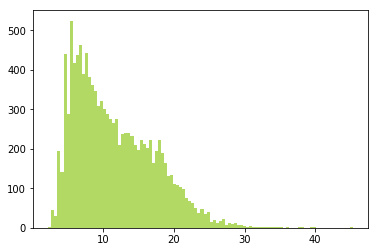

Statistics about W：
	Mean： 11.519676709936407
	Std： 5.612991623670815
	Min： 2
	Max： 45


In [25]:
import matplotlib.pyplot as plt
import numpy as np

resize = 150
boxW = np.array(W)/np.array(imgW)*resize  #x.astype(int)可以转换类型

plt.hist(boxW,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about W：")
print("\tMean：",np.array(boxW).mean())
print("\tStd：",np.array(boxW).std())
print("\tMin：",int(np.array(boxW).min()))
print("\tMax：",int(np.array(boxW).max()))

#### 高度

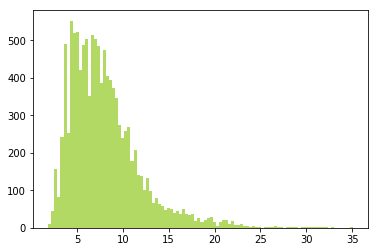

Statistics about H：
	Mean： 8.01370758543483
	Std： 3.859825840744946
	Min： 1
	Max： 35


In [27]:
import matplotlib.pyplot as plt
import numpy as np

resize = 150
boxH = np.array(H)/np.array(imgH)*resize

plt.hist(boxH,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about H：")
print("\tMean：",np.array(boxH).mean())
print("\tStd：",np.array(boxH).std())
print("\tMin：",int(np.array(boxH).min()))
print("\tMax：",int(np.array(boxH).max()))

#### 长宽比

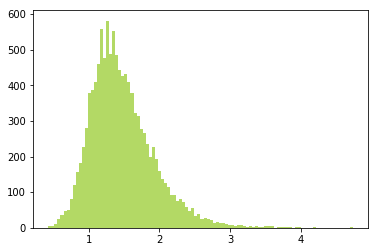

Statistics about nR：
	Mean： 1.474727003522839
	Std： 0.45221650720720585
	Min： 0
	Max： 4


In [44]:
import matplotlib.pyplot as plt
import numpy as np

Ratio = (np.array(W)/np.array(imgW))/(np.array(H)/np.array(imgH))
plt.hist(Ratio,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about nR：")
print("\tMean：",np.array(Ratio).mean())
print("\tStd：",np.array(Ratio).std())
print("\tMin：",int(np.array(Ratio).min()))
print("\tMax：",int(np.array(Ratio).max()))

#### 面积

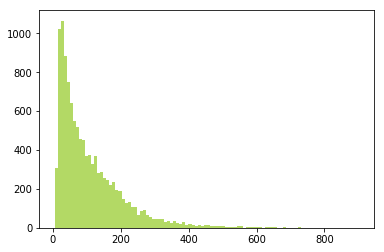

Statistics about nR：
	Mean： 107.74655542159735
	Std： 96.76159762170029
	Min： 4
	Max： 901


In [45]:
import matplotlib.pyplot as plt
import numpy as np

Sarea = (np.array(W)/np.array(imgW))*(np.array(H)/np.array(imgH))*150*150
plt.hist(Sarea,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about nR：")
print("\tMean：",np.array(Sarea).mean())
print("\tStd：",np.array(Sarea).std())
print("\tMin：",int(np.array(Sarea).min()))
print("\tMax：",int(np.array(Sarea).max()))

#### 散点图

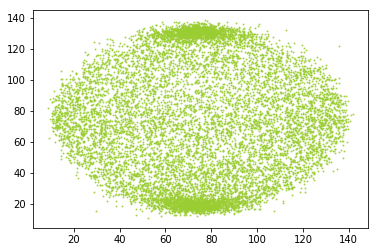

In [34]:
import matplotlib.pyplot as plt
import numpy as np

boxx = np.array(Xcenter)/np.array(imgW)*150
boxy = np.array(Ycenter)/np.array(imgH)*150

plt.scatter(boxx, boxy, s=1, facecolor='yellowgreen',alpha=0.75)
plt.show()

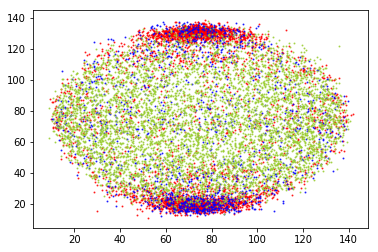

In [38]:
import matplotlib.pyplot as plt
import numpy as np

classes = ["top1","top2","botton1","botton2","botbad","bad"]
boxx = np.array(Xcenter)/np.array(imgW)*150
boxy = np.array(Ycenter)/np.array(imgH)*150

topx = []
topy = []
botx = []
boty = []
badx = []
bady = []

for i,c in enumerate(Labels):
    if c == 0 or c==1 :
        topx.append(boxx[i])
        topy.append(boxy[i])
    elif c==2 or c==3 or c==4 :
        botx.append(boxx[i])
        boty.append(boxy[i])
    elif c==5:
        badx.append(boxx[i])
        bady.append(boxy[i])

plt.scatter(topx, topy, s=1, facecolor='red',alpha=0.75)
plt.scatter(botx, boty, s=1, facecolor='blue',alpha=0.75)
plt.scatter(badx, bady, s=1, facecolor='yellowgreen',alpha=0.75)
plt.show()

#### 长宽比和面积散点图

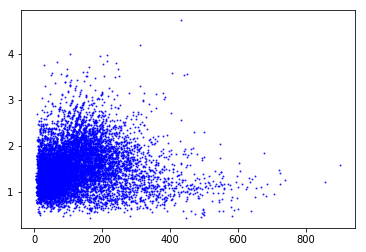

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(Sarea, Ratio, s=1, facecolor='blue',alpha=0.75)
plt.show()

改进：

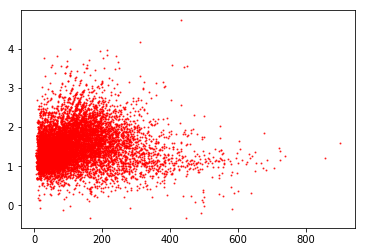

In [47]:
import matplotlib.pyplot as plt
import numpy as np

Ratio2 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio2.append(-1/c+2)
    else : Ratio2.append(c)
plt.scatter(Sarea, Ratio2, s=1, facecolor='red',alpha=0.75)
plt.show()

## 数据集3
去除较小的和比例不合适的。

### VOC转换为txt

In [48]:
import xml.etree.ElementTree as ET
import pickle
import os
import glob
from os import listdir, getcwd
from os.path import join
 
classes = ["top1","top2","botton1","botton2","botbad","bad"]
txtpath = "/media/newdata2/xys/DataSet/Orange/TagDoc/"
TxtName = 'Tag5.txt'
sizeW = []
sizeH = [] 

def Evaluate(w,h,box):
    boxw = box[2]-box[0]
    boxh = box[3]-box[1]
    a = boxw/w*150.
    b = boxh/h*150.
    Sarea = a*b
    Rate = a/b
    if a<=4 or b<=4 or Sarea<=16 or Rate>=4:
        return True
    else:
        return False
    

def convert_annotation(image_id):
    in_file = open('%s'%(image_id))       
    
    tree=ET.parse(in_file)
    root = tree.getroot()
    filename = root.find('filename').text
    size = root.find('size')  
    w = int(size.find('width').text)
    h = int(size.find('height').text)
    Flag=1    
    i=0
 
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes :
            continue
        i=i+1
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')   
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        if Evaluate(w,h,b):
            continue
        if Flag==1:
            with open(os.path.join(txtpath, TxtName), 'a') as f:  #Change 【Name】
                f.write('%s'%filename)
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))
            
            with open(os.path.join(txtpath, "WH%s"%TxtName), 'a') as f2:
                f2.write('%s'%filename)
                f2.write(' %d %d'%(w,h))
                f2.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))
            Flag=0
        else:
            with open(os.path.join(txtpath, TxtName), 'a') as f:
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))   
            with open(os.path.join(txtpath, "WH%s"%TxtName), 'a') as f2:
                f2.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],classes.index(cls)))
    if Flag==0:
        with open(os.path.join(txtpath, TxtName), 'a') as f:
            f.write('\n')
        with open(os.path.join(txtpath,  "WH%s"%TxtName), 'a') as f2:
            f2.write('\n')
    for t in range(i):
        sizeW.append(int(w))
        sizeH.append(int(h))
        
for imgfile in glob.glob("/media/newdata2/xys/DataSet/Orange/tag3/*.xml"):
        convert_annotation(imgfile)

### 提取信息：

In [167]:
import os
import torch

OrgName ="WHTag5.txt"
path = "/media/newdata2/xys/DataSet/Orange/TagDoc"
f = open(os.path.join(path, OrgName))
lines = f.readlines()

fnames = []
boxes = []
labels = []

#for statistic:
W = []        #检测框的宽度
H = []        #检测框的高度
imgW = []     #图像的宽度
imgH = []     #图像的高度
Labels =[]    #检测框的标签
Xcenter = []  #检测框的中心点坐标x
Ycenter = []  #检测框的中心点坐标y

for line in lines:
    splited = line.strip().split()
    fnames.append(splited[0])
    imgw=splited[1]
    imgh=splited[2]
    num_boxes = (len(splited) - 3) // 5
    box = []
    label = []
    for i in range(num_boxes):
        xmin = splited[3+5*i]
        ymin = splited[4+5*i]
        xmax = splited[5+5*i]
        ymax = splited[6+5*i]
        c = splited[7+5*i]
        box.append([float(xmin),float(ymin),float(xmax),float(ymax)])
        label.append(int(c))
        W.append(float(xmax)-float(xmin))
        H.append(float(ymax)-float(ymin))
        imgW.append(int(imgw))
        imgH.append(int(imgh))
        Labels.append(int(c))
        Xcenter.append((float(xmax)+float(xmin))/2.)
        Ycenter.append((float(ymax)+float(ymin))/2.)
    boxes.append(torch.Tensor(box))
    labels.append(torch.LongTensor(label))

print(len(fnames),len(boxes),len(labels))

print(len(W),len(H))
print(len(imgW),len(imgH),len(Labels))
print(len(Xcenter),len(Ycenter))

6685 6685 6685
10372 10372
10372 10372 10372
10372 10372


In [169]:
top = 0
botton = 0
botbad =0
bad = 0

for c in Labels:
    if c==0 or c==1:top=top+1
    elif c==2 or c ==3:botton = botton +1
    elif c==4:botbad = botbad +1
    else: bad = bad+1
print(top, botton,botbad,bad)

4057 712 770 4833


### 绘制图像
#### 宽度

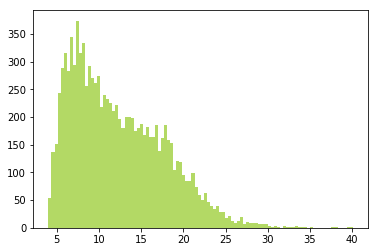

Statistics about W：
	Mean： 12.266683055343456
	Std： 5.413275660974671
	Min： 4
	Max： 40


In [82]:
import matplotlib.pyplot as plt
import numpy as np

resize = 150
boxW = np.array(W)/np.array(imgW)*resize  #x.astype(int)可以转换类型

plt.hist(boxW,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about W：")
print("\tMean：",np.array(boxW).mean())
print("\tStd：",np.array(boxW).std())
print("\tMin：",int(np.array(boxW).min()))
print("\tMax：",int(np.array(boxW).max()))

#### 高度

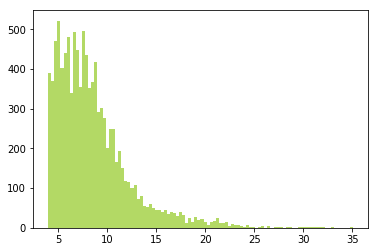

Statistics about H：
	Mean： 8.537899387712201
	Std： 3.732449046440348
	Min： 4
	Max： 35


In [83]:
import matplotlib.pyplot as plt
import numpy as np

resize = 150
boxH = np.array(H)/np.array(imgH)*resize

plt.hist(boxH,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about H：")
print("\tMean：",np.array(boxH).mean())
print("\tStd：",np.array(boxH).std())
print("\tMin：",int(np.array(boxH).min()))
print("\tMax：",int(np.array(boxH).max()))

#### 宽高比

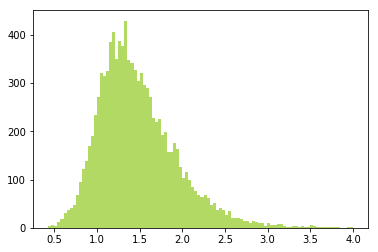

Statistics about nR：
	Mean： 1.4757913133312581
	Std： 0.4561094611433567
	Min： 0
	Max： 3


In [84]:
import matplotlib.pyplot as plt
import numpy as np

Ratio = (np.array(W)/np.array(imgW))/(np.array(H)/np.array(imgH))
plt.hist(Ratio,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about nR：")
print("\tMean：",np.array(Ratio).mean())
print("\tStd：",np.array(Ratio).std())
print("\tMin：",int(np.array(Ratio).min()))
print("\tMax：",int(np.array(Ratio).max()))

#### 面积

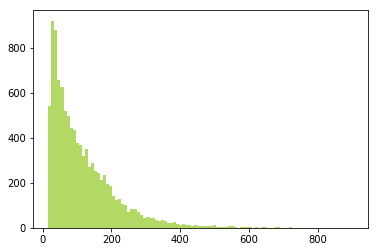

Statistics about nR：
	Mean： 118.11340814756964
	Std： 96.83886926184263
	Min： 16
	Max： 901


In [85]:
import matplotlib.pyplot as plt
import numpy as np

Sarea = (np.array(W)/np.array(imgW))*(np.array(H)/np.array(imgH))*150*150
plt.hist(Sarea,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)
plt.show()

print("Statistics about nR：")
print("\tMean：",np.array(Sarea).mean())
print("\tStd：",np.array(Sarea).std())
print("\tMin：",int(np.array(Sarea).min()))
print("\tMax：",int(np.array(Sarea).max()))

#### 散点图

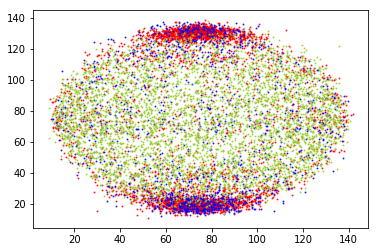

In [86]:
import matplotlib.pyplot as plt
import numpy as np

classes = ["top1","top2","botton1","botton2","botbad","bad"]
boxx = np.array(Xcenter)/np.array(imgW)*150
boxy = np.array(Ycenter)/np.array(imgH)*150

topx = []
topy = []
botx = []
boty = []
badx = []
bady = []

for i,c in enumerate(Labels):
    if c == 0 or c==1 :
        topx.append(boxx[i])
        topy.append(boxy[i])
    elif c==2 or c==3 or c==4 :
        botx.append(boxx[i])
        boty.append(boxy[i])
    elif c==5:
        badx.append(boxx[i])
        bady.append(boxy[i])

    
plt.scatter(topx, topy, s=1, facecolor='red',alpha=0.75)
plt.scatter(botx, boty, s=1, facecolor='blue',alpha=0.75)    
plt.scatter(badx, bady, s=1, facecolor='yellowgreen',alpha=0.75)
plt.show()

#### 宽高比与面积散点图

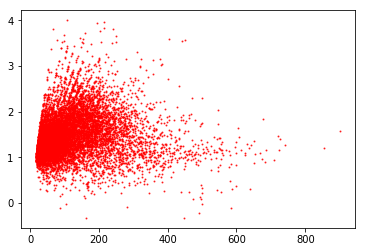

In [87]:
import matplotlib.pyplot as plt
import numpy as np

Ratio2 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio2.append(-1/c+2)
    else : Ratio2.append(c)
plt.scatter(Sarea, Ratio2, s=1, facecolor='red',alpha=0.75)
plt.show()

### 分离数据集

#### 三类分类数据集

In [171]:
import xml.etree.ElementTree as ET
import pickle
import os
import glob
from os import listdir, getcwd
from os.path import join
 
classes = ["top1","top2","botton1","botton2","botbad","bad"]
txtpath = "/media/newdata2/xys/DataSet/Orange/TagDoc/"
TxtName = 'Tag6.txt'
sizeW = []
sizeH = [] 

def Evaluate(w,h,box):
    boxw = box[2]-box[0]
    boxh = box[3]-box[1]
    a = boxw/w*150.
    b = boxh/h*150.
    Sarea = a*b
    Rate = a/b
    if a<=4 or b<=4 or Sarea<=16 or Rate>=4:
        return True
    else:
        return False
    

def convert_annotation(image_id):
    in_file = open('%s'%(image_id))       
    
    tree=ET.parse(in_file)
    root = tree.getroot()
    filename = root.find('filename').text
    size = root.find('size')  
    w = int(size.find('width').text)
    h = int(size.find('height').text)
    Flag=1    
    i=0
 
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes :
            continue
        i=i+1
        xmlbox = obj.find('bndbox')   
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        if Evaluate(w,h,b):
            continue
        cls_id = classes.index(cls)
        if cls_id == 0 or cls_id== 1:cls_id=0
        elif cls_id ==2 or cls_id ==3 or cls_id ==4 :cls_id=1
        elif cls_id ==5:cls_id=2
        if Flag==1:
            with open(os.path.join(txtpath, TxtName), 'a') as f:  #Change 【Name】
                f.write('%s'%filename)
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],cls_id))
            
            with open(os.path.join(txtpath, "WH2%s"%TxtName), 'a') as f2:
                f2.write('%s'%filename)
                f2.write(' %d %d'%(w,h))
                f2.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],cls_id))
            Flag=0
        else:
            with open(os.path.join(txtpath, TxtName), 'a') as f:
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],cls_id))   
            with open(os.path.join(txtpath, "WH2%s"%TxtName), 'a') as f2:
                f2.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],cls_id))
    if Flag==0:
        with open(os.path.join(txtpath, TxtName), 'a') as f:
            f.write('\n')
        with open(os.path.join(txtpath,  "WH2%s"%TxtName), 'a') as f2:
            f2.write('\n')
    for t in range(i):
        sizeW.append(int(w))
        sizeH.append(int(h))
        
for imgfile in glob.glob("/media/newdata2/xys/DataSet/Orange/tag3/*.xml"):
        convert_annotation(imgfile)

#### 拆分数据集

In [176]:
import random
import os

OrgName ="Tag6.txt"
TestName ="Tag6TestB.txt"
TrainName ="Tag6TrainB.txt"
path = "/media/newdata2/xys/DataSet/Orange/TagDoc"
ratio = 0.1 # for test

f = open(os.path.join(path, OrgName))
lines = f.readlines()
random.shuffle(lines)

length = len(lines)
segpoint = int(ratio*length)
linestest = lines[:segpoint]
linestrain = lines[segpoint:length]

print(len(linestest),len(linestrain))   
print(len(linestest)/length,len(linestrain)/length)

with open(os.path.join(path, TestName), 'a') as f1:
    f1.writelines(linestest)
with open(os.path.join(path, TrainName), 'a') as f2:
    f2.writelines(linestrain)

668 6017
0.09992520568436798 0.900074794315632


#### 提取信息

In [471]:
import os
import torch

OrgName ="WHTag6.txt"
path = "/media/newdata2/xys/DataSet/Orange/TagDoc"
f = open(os.path.join(path, OrgName))
lines = f.readlines()

fnames = []
boxes = []
labels = []

#for statistic:
W = []        #检测框的宽度
H = []        #检测框的高度
imgW = []     #图像的宽度
imgH = []     #图像的高度
Labels =[]    #检测框的标签
Xcenter = []  #检测框的中心点坐标x
Ycenter = []  #检测框的中心点坐标y

for line in lines:
    splited = line.strip().split()
    fnames.append(splited[0])
    imgw=splited[1]
    imgh=splited[2]
    num_boxes = (len(splited) - 3) // 5
    box = []
    label = []
    for i in range(num_boxes):
        xmin = splited[3+5*i]
        ymin = splited[4+5*i]
        xmax = splited[5+5*i]
        ymax = splited[6+5*i]
        c = splited[7+5*i]
        box.append([float(xmin),float(ymin),float(xmax),float(ymax)])
        label.append(int(c))
        W.append(float(xmax)-float(xmin))
        H.append(float(ymax)-float(ymin))
        imgW.append(int(imgw))
        imgH.append(int(imgh))
        Labels.append(int(c))
        Xcenter.append((float(xmax)+float(xmin))/2.)
        Ycenter.append((float(ymax)+float(ymin))/2.)
    boxes.append(torch.Tensor(box))
    labels.append(torch.LongTensor(label))

print(len(fnames),len(boxes),len(labels))

print(len(W),len(H))
print(len(imgW),len(imgH),len(Labels))
print(len(Xcenter),len(Ycenter))

6685 6685 6685
10372 10372
10372 10372 10372
10372 10372


In [472]:
top = 0
botton = 0
bad = 0


for c in Labels:
    if c==0:top=top+1
    elif c==1:botton = botton +1
    else: bad = bad+1
print(top, botton,bad)

4057 712 5603


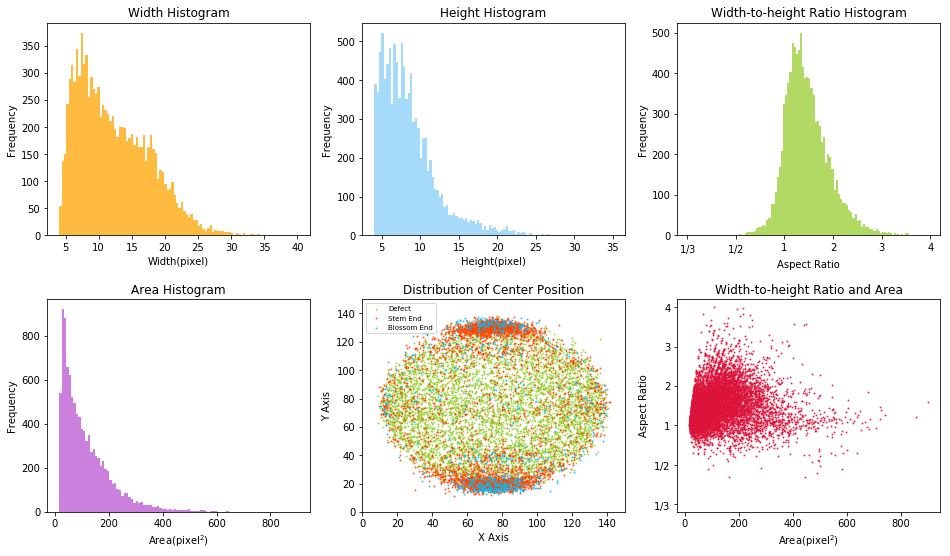

Statistics about W：
	Mean： 12.266683055343456
	Std： 5.413275660974671
	Min： 4
	Max： 40
Statistics about H：
	Mean： 8.537899387712201
	Std： 3.732449046440348
	Min： 4
	Max： 35
Statistics about nR：
	Mean： 1.4757913133312581
	Std： 0.4561094611433567
	Min： 0
	Max： 3
Statistics about nR：
	Mean： 118.11340814756964
	Std： 96.83886926184263
	Min： 16
	Max： 901


In [473]:
import matplotlib.pyplot as plt
import numpy as np

resize = 150
boxW = np.array(W)/np.array(imgW)*resize  #x.astype(int)可以转换类型
boxH = np.array(H)/np.array(imgH)*resize
Ratio = (np.array(W)/np.array(imgW))/(np.array(H)/np.array(imgH))
Sarea = (np.array(W)/np.array(imgW))*(np.array(H)/np.array(imgH))*150*150

boxx = np.array(Xcenter)/np.array(imgW)*150
boxy = np.array(Ycenter)/np.array(imgH)*150
topx = []
topy = []
botx = []
boty = []
badx = []
bady = []
for i,c in enumerate(Labels):
    if c == 0:
        topx.append(boxx[i])
        topy.append(boxy[i])
    elif c==1:
        botx.append(boxx[i])
        boty.append(boxy[i])
    elif c==2:
        badx.append(boxx[i])
        bady.append(boxy[i])
        
Ratio1 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio1.append(-1/c+2)
    else : Ratio1.append(c)
Ratio2 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio2.append(-1/c+2)
    else : Ratio2.append(c)

plt.figure(figsize=(16, 9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)

plt.subplot(231)
plt.title("Width Histogram")
plt.xlabel('Width(pixel)')
plt.ylabel('Frequency')
plt.hist(boxW,100,density=0,histtype='stepfilled',facecolor='orange',alpha=0.75)

plt.subplot(232)
plt.title("Height Histogram")
plt.xlabel('Height(pixel)')
plt.ylabel('Frequency')
plt.hist(boxH,100,density=0,histtype='stepfilled',facecolor='lightskyblue',alpha=0.75)

plt.subplot(233)
plt.title("Width-to-height Ratio Histogram")
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.xlim((-1.2, 4.2))
plt.xticks([-1,0,1,2,3,4],['$1/3$','$1/2$',1,2,3,4])
plt.hist(Ratio1,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75)

plt.subplot(234)
plt.title("Area Histogram")
plt.xlabel('Area(pixel$^2$)')
plt.ylabel('Frequency')
plt.hist(Sarea,100,density=0,histtype='stepfilled',facecolor='mediumorchid',alpha=0.75)

plt.subplot(235)
plt.title("Distribution of Center Position")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.xlim((0, 150))
plt.ylim((0, 150))

plt.scatter(badx, bady, s=1, facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.scatter(topx, topy, s=1, facecolor='orangered',alpha=0.75,label='Stem End')
plt.scatter(botx, boty, s=1, facecolor='deepskyblue',alpha=0.75,label='Blossom End')
font1 ={'size':7,}
plt.legend(loc="upper left",prop=font1)

plt.subplot(236)
plt.title("Width-to-height Ratio and Area")
plt.xlabel('Area(pixel$^2$)')
plt.ylabel('Aspect Ratio')
plt.ylim((-1.2, 4.2))
plt.yticks([-1,0,1,2,3,4],['$1/3$','$1/2$',1,2,3,4])
plt.scatter(Sarea, Ratio2, s=1, facecolor='crimson',alpha=0.75)
plt.savefig("examples.eps")

plt.show()

print("Statistics about W：")
print("\tMean：",np.array(boxW).mean())
print("\tStd：",np.array(boxW).std())
print("\tMin：",int(np.array(boxW).min()))
print("\tMax：",int(np.array(boxW).max()))

print("Statistics about H：")
print("\tMean：",np.array(boxH).mean())
print("\tStd：",np.array(boxH).std())
print("\tMin：",int(np.array(boxH).min()))
print("\tMax：",int(np.array(boxH).max()))

print("Statistics about nR：")
print("\tMean：",np.array(Ratio).mean())
print("\tStd：",np.array(Ratio).std())
print("\tMin：",int(np.array(Ratio).min()))
print("\tMax：",int(np.array(Ratio).max()))

print("Statistics about nR：")
print("\tMean：",np.array(Sarea).mean())
print("\tStd：",np.array(Sarea).std())
print("\tMin：",int(np.array(Sarea).min()))
print("\tMax：",int(np.array(Sarea).max()))




##### 绘制依据类别的图（新）

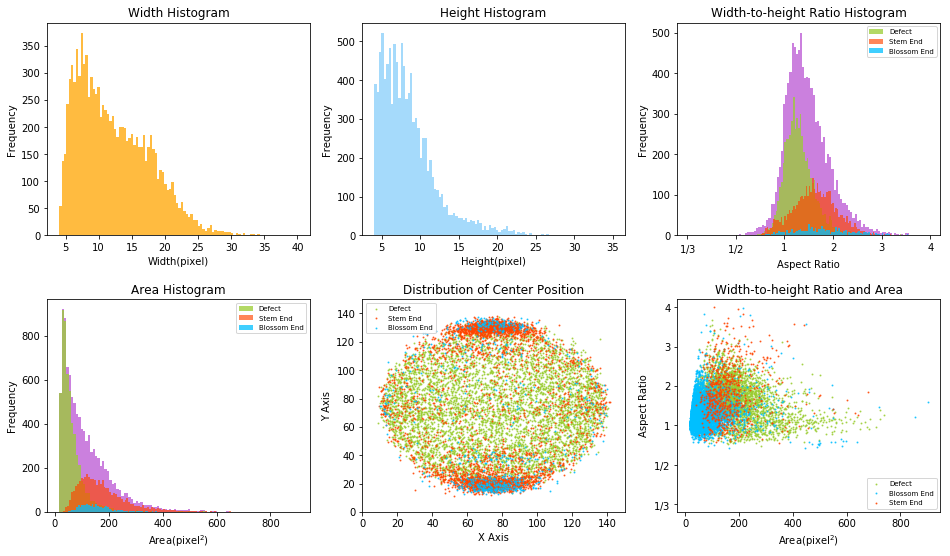

Statistics about W：
	Mean： 12.266683055343456
	Std： 5.413275660974671
	Min： 4
	Max： 40
Statistics about H：
	Mean： 8.537899387712201
	Std： 3.732449046440348
	Min： 4
	Max： 35
Statistics about nR：
	Mean： 1.4757913133312581
	Std： 0.4561094611433567
	Min： 0
	Max： 3
Statistics about nR：
	Mean： 118.11340814756964
	Std： 96.83886926184263
	Min： 16
	Max： 901


In [487]:
import matplotlib.pyplot as plt
import numpy as np

resize = 150
boxW = np.array(W)/np.array(imgW)*resize  #x.astype(int)可以转换类型
boxH = np.array(H)/np.array(imgH)*resize
Ratio = (np.array(W)/np.array(imgW))/(np.array(H)/np.array(imgH))
Sarea = (np.array(W)/np.array(imgW))*(np.array(H)/np.array(imgH))*150*150

boxx = np.array(Xcenter)/np.array(imgW)*150
boxy = np.array(Ycenter)/np.array(imgH)*150
topx = []
topy = []
botx = []
boty = []
badx = []
bady = []
toprat = []
topsar = []
botrat = []
botsar = []
badrat = []
badsar = []

for i,c in enumerate(Labels):
    if c == 0:
        topx.append(boxx[i])
        topy.append(boxy[i])
        toprat.append(Ratio[i])
        topsar.append(Sarea[i])
    elif c==1:
        botx.append(boxx[i])
        boty.append(boxy[i])
        botrat.append(Ratio[i])
        botsar.append(Sarea[i])
    elif c==2:
        badx.append(boxx[i])
        bady.append(boxy[i])
        badrat.append(Ratio[i])
        badsar.append(Sarea[i])
        
Ratio1 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio1.append(-1/c+2)
    else : Ratio1.append(c)
Ratio2 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio2.append(-1/c+2)
    else : Ratio2.append(c)

plt.figure(figsize=(16, 9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)

plt.subplot(231)
plt.title("Width Histogram")
plt.xlabel('Width(pixel)')
plt.ylabel('Frequency')
plt.hist(boxW,100,density=0,histtype='stepfilled',facecolor='orange',alpha=0.75)

plt.subplot(232)
plt.title("Height Histogram")
plt.xlabel('Height(pixel)')
plt.ylabel('Frequency')
plt.hist(boxH,100,density=0,histtype='stepfilled',facecolor='lightskyblue',alpha=0.75)

plt.subplot(233)
plt.title("Width-to-height Ratio Histogram")
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.xlim((-1.2, 4.2))
plt.xticks([-1,0,1,2,3,4],['$1/3$','$1/2$',1,2,3,4])
plt.hist(Ratio1,100,density=0,histtype='stepfilled',facecolor='mediumorchid',alpha=0.75)
plt.hist(badrat,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.hist(toprat,100,density=0,histtype='stepfilled',facecolor='orangered',alpha=0.65,label='Stem End')
plt.hist(botrat,100,density=0,histtype='stepfilled',facecolor='deepskyblue',alpha=0.75,label='Blossom End')

font1 ={'size':7,}
plt.legend(loc="upper right",prop=font1)


plt.subplot(234)
plt.title("Area Histogram")
plt.xlabel('Area(pixel$^2$)')
plt.ylabel('Frequency')
plt.hist(Sarea,100,density=0,histtype='stepfilled',facecolor='mediumorchid',alpha=0.75)
plt.hist(badsar,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.hist(topsar,100,density=0,histtype='stepfilled',facecolor='orangered',alpha=0.65,label='Stem End')
plt.hist(botsar,100,density=0,histtype='stepfilled',facecolor='deepskyblue',alpha=0.75,label='Blossom End')

font1 ={'size':7,}
plt.legend(loc="upper right",prop=font1)

plt.subplot(235)
plt.title("Distribution of Center Position")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.xlim((0, 150))
plt.ylim((0, 150))

plt.scatter(badx, bady, s=1, facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.scatter(topx, topy, s=1, facecolor='orangered',alpha=0.75,label='Stem End')
plt.scatter(botx, boty, s=1, facecolor='deepskyblue',alpha=0.75,label='Blossom End')
font1 ={'size':7,}
plt.legend(loc="upper left",prop=font1)

plt.subplot(236)
plt.title("Width-to-height Ratio and Area")
plt.xlabel('Area(pixel$^2$)')
plt.ylabel('Aspect Ratio')
plt.ylim((-1.2, 4.2))
plt.yticks([-1,0,1,2,3,4],['$1/3$','$1/2$',1,2,3,4])

plt.scatter(topsar, toprat, s=1, facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.scatter(badsar, badrat, s=1, facecolor='deepskyblue',alpha=0.75,label='Blossom End')
plt.scatter(botsar, botrat, s=1, facecolor='orangered',alpha=0.75,label='Stem End')

font1 ={'size':7,}
plt.legend(loc="lower right",prop=font1)
plt.savefig("examples.eps")

plt.show()

print("Statistics about W：")
print("\tMean：",np.array(boxW).mean())
print("\tStd：",np.array(boxW).std())
print("\tMin：",int(np.array(boxW).min()))
print("\tMax：",int(np.array(boxW).max()))

print("Statistics about H：")
print("\tMean：",np.array(boxH).mean())
print("\tStd：",np.array(boxH).std())
print("\tMin：",int(np.array(boxH).min()))
print("\tMax：",int(np.array(boxH).max()))

print("Statistics about nR：")
print("\tMean：",np.array(Ratio).mean())
print("\tStd：",np.array(Ratio).std())
print("\tMin：",int(np.array(Ratio).min()))
print("\tMax：",int(np.array(Ratio).max()))

print("Statistics about nR：")
print("\tMean：",np.array(Sarea).mean())
print("\tStd：",np.array(Sarea).std())
print("\tMin：",int(np.array(Sarea).min()))
print("\tMax：",int(np.array(Sarea).max()))




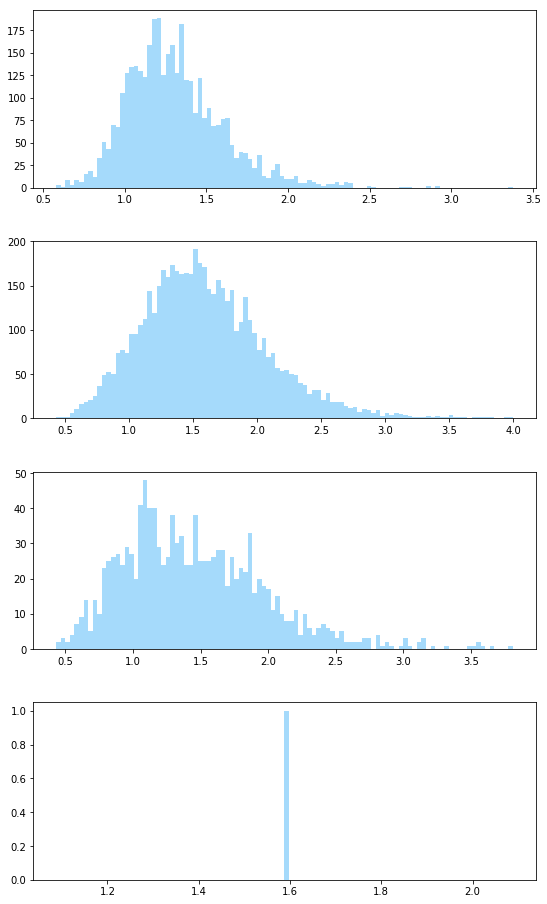

Statistics about A1：
	Mean： 1.307195578841497
	Std： 0.2968690214076397
	Min： 0
	Max： 3
Statistics about A2：
	Mean： 1.5951472605506236
	Std： 0.4886786994014048
	Min： 0
	Max： 3
Statistics about A3：
	Mean： 1.4547463199407353
	Std： 0.5322992316112407
	Min： 0
	Max： 3
Statistics about A4：
	Mean： 1.5877916331456154
	Std： 0.0
	Min： 1
	Max： 1


In [255]:
import matplotlib.pyplot as plt
import numpy as np

A1 =[]
A2 =[]
A3 =[]
A4 =[]
g1 =3.95**2
g2 =7.89**2
g3 =15**2
g4 =30**2
for i, c in enumerate(Sarea):
    if c>=g1 and c<g2 : A1.append(Ratio[i])
    elif c>=g2 and c<g3 : A2.append(Ratio[i])
    elif c>=g3 and c<g4 : A3.append(Ratio[i])
    else : A4.append(Ratio[i])

plt.figure(figsize=(9, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)
plt.subplot(411)
plt.hist(A1,100,density=0,histtype='stepfilled',facecolor='lightskyblue',alpha=0.75)
plt.subplot(412)
plt.hist(A2,100,density=0,histtype='stepfilled',facecolor='lightskyblue',alpha=0.75)
plt.subplot(413)
plt.hist(A3,100,density=0,histtype='stepfilled',facecolor='lightskyblue',alpha=0.75)
plt.subplot(414)
plt.hist(A4,100,density=0,histtype='stepfilled',facecolor='lightskyblue',alpha=0.75)
plt.show()

print("Statistics about A1：")
print("\tMean：",np.array(A1).mean())
print("\tStd：",np.array(A1).std())
print("\tMin：",int(np.array(A1).min()))
print("\tMax：",int(np.array(A1).max()))

print("Statistics about A2：")
print("\tMean：",np.array(A2).mean())
print("\tStd：",np.array(A2).std())
print("\tMin：",int(np.array(A2).min()))
print("\tMax：",int(np.array(A2).max()))

print("Statistics about A3：")
print("\tMean：",np.array(A3).mean())
print("\tStd：",np.array(A3).std())
print("\tMin：",int(np.array(A3).min()))
print("\tMax：",int(np.array(A3).max()))

print("Statistics about A4：")
print("\tMean：",np.array(A4).mean())
print("\tStd：",np.array(A4).std())
print("\tMin：",int(np.array(A4).min()))
print("\tMax：",int(np.array(A4).max()))

## 平衡抽取数据集

### 抽取botton类出来

In [178]:
import xml.etree.ElementTree as ET
import pickle
import os
import glob
from os import listdir, getcwd
from os.path import join
 
classes = ["top1","top2","botton1","botton2","botbad","bad"]
txtpath = "/media/newdata2/xys/DataSet/Orange/TagDoc/"
TxtName = 'Tag7.txt'
nobot ='Tag7.txt'
yebot ='Tag7bot.txt'
sizeW = []
sizeH = [] 

def Evaluate(w,h,box):
    boxw = box[2]-box[0]
    boxh = box[3]-box[1]
    a = boxw/w*150.
    b = boxh/h*150.
    Sarea = a*b
    Rate = a/b
    if a<=4 or b<=4 or Sarea<=16 or Rate>=4:
        return True
    else:
        return False

def findbot(root):
    Flag = False
    for obj in root.iter('object'):
        cls = obj.find('name').text
        cls_id = classes.index(cls)
        if cls_id ==2 or cls_id==3 or cls_id==4:Flag =True
    return Flag

def convert_annotation(image_id):
    in_file = open('%s'%(image_id))       
    
    tree=ET.parse(in_file)
    root = tree.getroot()
    filename = root.find('filename').text
    size = root.find('size')  
    w = int(size.find('width').text)
    h = int(size.find('height').text)
    Flag=1    
    i=0
 
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes :
            continue
        i=i+1
        xmlbox = obj.find('bndbox')   
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        if Evaluate(w,h,b):
            continue
        cls_id = classes.index(cls)
        if cls_id == 0 or cls_id== 1:cls_id=0
        elif cls_id ==2 or cls_id ==3 or cls_id ==4 :cls_id=1
        elif cls_id ==5:cls_id=2
        if Flag==1:
            if findbot(root):TxtName = yebot
            else: TxtName = nobot
            with open(os.path.join(txtpath, TxtName), 'a') as f:  #Change 【Name】
                f.write('%s'%filename)
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],cls_id))
            
            with open(os.path.join(txtpath, "WH2%s"%TxtName), 'a') as f2:
                f2.write('%s'%filename)
                f2.write(' %d %d'%(w,h))
                f2.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],cls_id))
            Flag=0
        else:
            with open(os.path.join(txtpath, TxtName), 'a') as f:
                f.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],cls_id))   
            with open(os.path.join(txtpath, "WH2%s"%TxtName), 'a') as f2:
                f2.write(' %d %d %d %d %d'%(b[0],b[1],b[2],b[3],cls_id))
    if Flag==0:
        with open(os.path.join(txtpath, TxtName), 'a') as f:
            f.write('\n')
        with open(os.path.join(txtpath,  "WH2%s"%TxtName), 'a') as f2:
            f2.write('\n')
    for t in range(i):
        sizeW.append(int(w))
        sizeH.append(int(h))
        
for imgfile in glob.glob("/media/newdata2/xys/DataSet/Orange/tag3/*.xml"):
        convert_annotation(imgfile)

### 信息统计

In [497]:
import os
import torch

OrgName ="WH2Tag7bot.txt"
path = "/media/newdata2/xys/DataSet/Orange/TagDoc"
f = open(os.path.join(path, OrgName))
lines = f.readlines()

fnames = []
boxes = []
labels = []

#for statistic:
W = []        #检测框的宽度
H = []        #检测框的高度
imgW = []     #图像的宽度
imgH = []     #图像的高度
Labels =[]    #检测框的标签
Xcenter = []  #检测框的中心点坐标x
Ycenter = []  #检测框的中心点坐标y

for line in lines:
    splited = line.strip().split()
    fnames.append(splited[0])
    imgw=splited[1]
    imgh=splited[2]
    num_boxes = (len(splited) - 3) // 5
    box = []
    label = []
    for i in range(num_boxes):
        xmin = splited[3+5*i]
        ymin = splited[4+5*i]
        xmax = splited[5+5*i]
        ymax = splited[6+5*i]
        c = splited[7+5*i]
        box.append([float(xmin),float(ymin),float(xmax),float(ymax)])
        label.append(int(c))
        W.append(float(xmax)-float(xmin))
        H.append(float(ymax)-float(ymin))
        imgW.append(int(imgw))
        imgH.append(int(imgh))
        Labels.append(int(c))
        Xcenter.append((float(xmax)+float(xmin))/2.)
        Ycenter.append((float(ymax)+float(ymin))/2.)
    boxes.append(torch.Tensor(box))
    labels.append(torch.LongTensor(label))

print(len(fnames),len(boxes),len(labels))

print(len(W),len(H))
print(len(imgW),len(imgH),len(Labels))
print(len(Xcenter),len(Ycenter))

1482 1482 1482
2072 2072
2072 2072 2072
2072 2072


#### 7 generate data set：

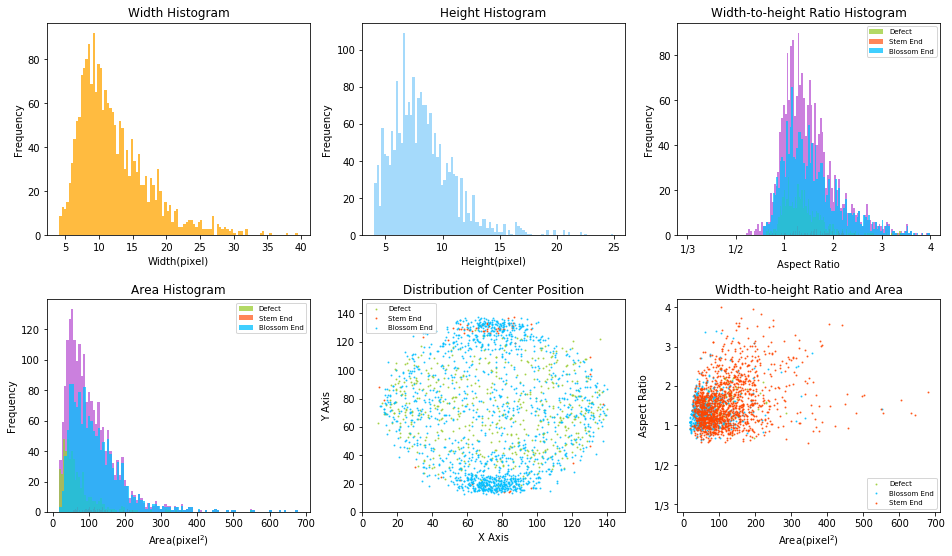

Statistics about W：
	Mean： 12.217451894064355
	Std： 5.2102982345890245
	Min： 4
	Max： 39
Statistics about H：
	Mean： 8.265903003654712
	Std： 2.730004023019795
	Min： 4
	Max： 24
Statistics about nR：
	Mean： 1.519292878814644
	Std： 0.5500333631957901
	Min： 0
	Max： 3
Statistics about nR：
	Mean： 108.00633781169914
	Std： 74.95060752225415
	Min： 17
	Max： 678


In [498]:
import matplotlib.pyplot as plt
import numpy as np

resize = 150
boxW = np.array(W)/np.array(imgW)*resize  #x.astype(int)可以转换类型
boxH = np.array(H)/np.array(imgH)*resize
Ratio = (np.array(W)/np.array(imgW))/(np.array(H)/np.array(imgH))
Sarea = (np.array(W)/np.array(imgW))*(np.array(H)/np.array(imgH))*150*150

boxx = np.array(Xcenter)/np.array(imgW)*150
boxy = np.array(Ycenter)/np.array(imgH)*150
topx = []
topy = []
botx = []
boty = []
badx = []
bady = []
toprat = []
topsar = []
botrat = []
botsar = []
badrat = []
badsar = []

for i,c in enumerate(Labels):
    if c == 0:
        topx.append(boxx[i])
        topy.append(boxy[i])
        toprat.append(Ratio[i])
        topsar.append(Sarea[i])
    elif c==1:
        botx.append(boxx[i])
        boty.append(boxy[i])
        botrat.append(Ratio[i])
        botsar.append(Sarea[i])
    elif c==2:
        badx.append(boxx[i])
        bady.append(boxy[i])
        badrat.append(Ratio[i])
        badsar.append(Sarea[i])
        
Ratio1 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio1.append(-1/c+2)
    else : Ratio1.append(c)
Ratio2 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio2.append(-1/c+2)
    else : Ratio2.append(c)

plt.figure(figsize=(16, 9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)

plt.subplot(231)
plt.title("Width Histogram")
plt.xlabel('Width(pixel)')
plt.ylabel('Frequency')
plt.hist(boxW,100,density=0,histtype='stepfilled',facecolor='orange',alpha=0.75)

plt.subplot(232)
plt.title("Height Histogram")
plt.xlabel('Height(pixel)')
plt.ylabel('Frequency')
plt.hist(boxH,100,density=0,histtype='stepfilled',facecolor='lightskyblue',alpha=0.75)

plt.subplot(233)
plt.title("Width-to-height Ratio Histogram")
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.xlim((-1.2, 4.2))
plt.xticks([-1,0,1,2,3,4],['$1/3$','$1/2$',1,2,3,4])
plt.hist(Ratio1,100,density=0,histtype='stepfilled',facecolor='mediumorchid',alpha=0.75)
plt.hist(badrat,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.hist(toprat,100,density=0,histtype='stepfilled',facecolor='orangered',alpha=0.65,label='Stem End')
plt.hist(botrat,100,density=0,histtype='stepfilled',facecolor='deepskyblue',alpha=0.75,label='Blossom End')

font1 ={'size':7,}
plt.legend(loc="upper right",prop=font1)


plt.subplot(234)
plt.title("Area Histogram")
plt.xlabel('Area(pixel$^2$)')
plt.ylabel('Frequency')
plt.hist(Sarea,100,density=0,histtype='stepfilled',facecolor='mediumorchid',alpha=0.75)
plt.hist(badsar,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.hist(topsar,100,density=0,histtype='stepfilled',facecolor='orangered',alpha=0.65,label='Stem End')
plt.hist(botsar,100,density=0,histtype='stepfilled',facecolor='deepskyblue',alpha=0.75,label='Blossom End')

font1 ={'size':7,}
plt.legend(loc="upper right",prop=font1)

plt.subplot(235)
plt.title("Distribution of Center Position")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.xlim((0, 150))
plt.ylim((0, 150))

plt.scatter(badx, bady, s=1, facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.scatter(topx, topy, s=1, facecolor='orangered',alpha=0.75,label='Stem End')
plt.scatter(botx, boty, s=1, facecolor='deepskyblue',alpha=0.75,label='Blossom End')
font1 ={'size':7,}
plt.legend(loc="upper left",prop=font1)

plt.subplot(236)
plt.title("Width-to-height Ratio and Area")
plt.xlabel('Area(pixel$^2$)')
plt.ylabel('Aspect Ratio')
plt.ylim((-1.2, 4.2))
plt.yticks([-1,0,1,2,3,4],['$1/3$','$1/2$',1,2,3,4])

plt.scatter(topsar, toprat, s=1, facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.scatter(badsar, badrat, s=1, facecolor='deepskyblue',alpha=0.75,label='Blossom End')
plt.scatter(botsar, botrat, s=1, facecolor='orangered',alpha=0.75,label='Stem End')

font1 ={'size':7,}
plt.legend(loc="lower right",prop=font1)
plt.savefig("examples.eps")

plt.show()

print("Statistics about W：")
print("\tMean：",np.array(boxW).mean())
print("\tStd：",np.array(boxW).std())
print("\tMin：",int(np.array(boxW).min()))
print("\tMax：",int(np.array(boxW).max()))

print("Statistics about H：")
print("\tMean：",np.array(boxH).mean())
print("\tStd：",np.array(boxH).std())
print("\tMin：",int(np.array(boxH).min()))
print("\tMax：",int(np.array(boxH).max()))

print("Statistics about nR：")
print("\tMean：",np.array(Ratio).mean())
print("\tStd：",np.array(Ratio).std())
print("\tMin：",int(np.array(Ratio).min()))
print("\tMax：",int(np.array(Ratio).max()))

print("Statistics about nR：")
print("\tMean：",np.array(Sarea).mean())
print("\tStd：",np.array(Sarea).std())
print("\tMin：",int(np.array(Sarea).min()))
print("\tMax：",int(np.array(Sarea).max()))


In [496]:
top = 0
botton = 0
bad = 0


for c in Labels:
    if c==0:top=top+1
    elif c==1:botton = botton +1
    else: bad = bad+1
print(top, botton,bad)

63 1482 527


### 拆分数据集

In [184]:
import random
import os

OrgName ="Tag7.txt"
TestName ="bnoTest7.txt"
TrainName ="bnoTrain7.txt"
path = "/media/newdata2/xys/DataSet/Orange/TagDoc"
ratio = 0.1 # for test

f = open(os.path.join(path, OrgName))
lines = f.readlines()
random.shuffle(lines)

length = 2000#len(lines)
segpoint = int(ratio*length)
linestest = lines[:segpoint]
linestrain = lines[segpoint:length]

print(len(linestest),len(linestrain))   
print(len(linestest)/length,len(linestrain)/length)

with open(os.path.join(path, TestName), 'a') as f1:
    f1.writelines(linestest)
with open(os.path.join(path, TrainName), 'a') as f2:
    f2.writelines(linestrain)

200 1800
0.1 0.9


### 重组数据集统计

In [499]:
import os
import torch

OrgName ="Tag7Train.txt"#Test
path = "/media/newdata2/xys/DataSet/Orange/TagDoc"
f = open(os.path.join(path, OrgName))
lines = f.readlines()

fnames = []
boxes = []
labels = []

#for statistic:
W = []        #检测框的宽度
H = []        #检测框的高度
Labels =[]    #检测框的标签
Xcenter = []  #检测框的中心点坐标x
Ycenter = []  #检测框的中心点坐标y

for line in lines:
    splited = line.strip().split()
    fnames.append(splited[0])
    imgw=splited[1]
    imgh=splited[2]
    num_boxes = (len(splited) - 1) // 5
    box = []
    label = []
    for i in range(num_boxes):
        xmin = splited[1+5*i]
        ymin = splited[2+5*i]
        xmax = splited[3+5*i]
        ymax = splited[4+5*i]
        c = splited[5+5*i]
        box.append([float(xmin),float(ymin),float(xmax),float(ymax)])
        label.append(int(c))
        W.append(float(xmax)-float(xmin))
        H.append(float(ymax)-float(ymin))
        Labels.append(int(c))
        Xcenter.append((float(xmax)+float(xmin))/2.)
        Ycenter.append((float(ymax)+float(ymin))/2.)
    boxes.append(torch.Tensor(box))
    labels.append(torch.LongTensor(label))

print(len(fnames),len(boxes),len(labels))

print(len(W),len(H))
print(len(Labels))
print(len(Xcenter),len(Ycenter))
#print(fnames)

3134 3134 3134
4765 4765
4765
4765 4765


#### More Powerful Data Statistic

In [502]:
import os
import torch

fnames = []
boxes = []
labels = []

#for statistic:
W = []        #检测框的宽度
H = []        #检测框的高度
Labels =[]    #检测框的标签
Xcenter = []  #检测框的中心点坐标x
Ycenter = []  #检测框的中心点坐标y

path = "/media/newdata2/xys/DataSet/Orange/TagDoc"
for OrgName in ["Tag7Train.txt","Tag7Test.txt"]:
    f = open(os.path.join(path, OrgName))
    lines = f.readlines()
    for line in lines:
        splited = line.strip().split()
        fnames.append(splited[0])
        num_boxes = (len(splited) - 1) // 5
        box = []
        label = []
        for i in range(num_boxes):
            xmin = splited[1+5*i]
            ymin = splited[2+5*i]
            xmax = splited[3+5*i]
            ymax = splited[4+5*i]
            c = splited[5+5*i]
            box.append([float(xmin),float(ymin),float(xmax),float(ymax)])
            label.append(int(c))
            W.append(float(xmax)-float(xmin))
            H.append(float(ymax)-float(ymin))
            Labels.append(int(c))
            Xcenter.append((float(xmax)+float(xmin))/2.)
            Ycenter.append((float(ymax)+float(ymin))/2.)
        boxes.append(torch.Tensor(box))
        labels.append(torch.LongTensor(label))

OrgName ="WHTag6.txt"
path = "/media/newdata2/xys/DataSet/Orange/TagDoc"
f = open(os.path.join(path, OrgName))
lines = f.readlines()

imgW = []     #图像的宽度
imgH = []     #图像的高度
dicx = {}

for line in lines:
    splited = line.strip().split()
    fname = splited[0]
    imgw=splited[1]
    imgh=splited[2]
    num_boxes = (len(splited) - 3) // 5
    imgWt = []
    imgHt = []
    for i in range(num_boxes):
        imgWt.append(int(imgw))
        imgHt.append(int(imgh))
    dicx.update({fname:[imgWt,imgHt]})

for fname in fnames:
    wh = dicx.get(fname)
    imgW=imgW+wh[0]
    imgH=imgH+wh[1]
    
print(len(fnames),len(boxes),len(labels))

print(len(W),len(H),len(imgW),len(imgH))
print(len(Labels))
print(len(Xcenter),len(Ycenter))
#print(fnames)

3482 3482 3482
5315 5315 5315 5315
5315
5315 5315


#### Draw image

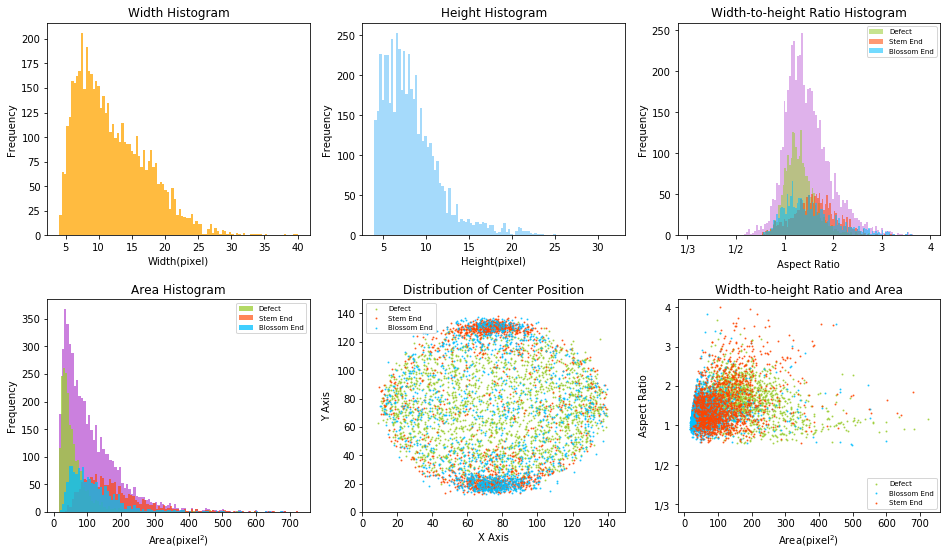

Statistics about W：
	Mean： 12.130428390052034
	Std： 5.3068285548274305
	Min： 4
	Max： 40
Statistics about H：
	Mean： 8.38905623587337
	Std： 3.4195704769453714
	Min： 4
	Max： 31
Statistics about nR：
	Mean： 1.4828598372821236
	Std： 0.47782316968334815
	Min： 0
	Max： 3
Statistics about nR：
	Mean： 113.09481804868086
	Std： 88.78470716681932
	Min： 16
	Max： 724


In [510]:
import matplotlib.pyplot as plt
import numpy as np

resize = 150
boxW = np.array(W)/np.array(imgW)*resize  #x.astype(int)可以转换类型
boxH = np.array(H)/np.array(imgH)*resize
Ratio = (np.array(W)/np.array(imgW))/(np.array(H)/np.array(imgH))
Sarea = (np.array(W)/np.array(imgW))*(np.array(H)/np.array(imgH))*150*150

boxx = np.array(Xcenter)/np.array(imgW)*150
boxy = np.array(Ycenter)/np.array(imgH)*150
topx = []
topy = []
botx = []
boty = []
badx = []
bady = []
toprat = []
topsar = []
botrat = []
botsar = []
badrat = []
badsar = []

for i,c in enumerate(Labels):
    if c == 0:
        topx.append(boxx[i])
        topy.append(boxy[i])
        toprat.append(Ratio[i])
        topsar.append(Sarea[i])
    elif c==1:
        botx.append(boxx[i])
        boty.append(boxy[i])
        botrat.append(Ratio[i])
        botsar.append(Sarea[i])
    elif c==2:
        badx.append(boxx[i])
        bady.append(boxy[i])
        badrat.append(Ratio[i])
        badsar.append(Sarea[i])
        
Ratio1 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio1.append(-1/c+2)
    else : Ratio1.append(c)
Ratio2 =[]
for i, c in enumerate(Ratio):
    if c<1 : Ratio2.append(-1/c+2)
    else : Ratio2.append(c)

plt.figure(figsize=(16, 9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)

plt.subplot(231)
plt.title("Width Histogram")
plt.xlabel('Width(pixel)')
plt.ylabel('Frequency')
plt.hist(boxW,100,density=0,histtype='stepfilled',facecolor='orange',alpha=0.75)

plt.subplot(232)
plt.title("Height Histogram")
plt.xlabel('Height(pixel)')
plt.ylabel('Frequency')
plt.hist(boxH,100,density=0,histtype='stepfilled',facecolor='lightskyblue',alpha=0.75)

plt.subplot(233)
plt.title("Width-to-height Ratio Histogram")
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.xlim((-1.2, 4.2))
plt.xticks([-1,0,1,2,3,4],['$1/3$','$1/2$',1,2,3,4])
plt.hist(Ratio1,100,density=0,histtype='stepfilled',facecolor='mediumorchid',alpha=0.45)
plt.hist(badrat,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.55,label='Defect')
plt.hist(toprat,100,density=0,histtype='stepfilled',facecolor='orangered',alpha=0.55,label='Stem End')
plt.hist(botrat,100,density=0,histtype='stepfilled',facecolor='deepskyblue',alpha=0.55,label='Blossom End')

font1 ={'size':7,}
plt.legend(loc="upper right",prop=font1)


plt.subplot(234)
plt.title("Area Histogram")
plt.xlabel('Area(pixel$^2$)')
plt.ylabel('Frequency')
plt.hist(Sarea,100,density=0,histtype='stepfilled',facecolor='mediumorchid',alpha=0.75)
plt.hist(badsar,100,density=0,histtype='stepfilled',facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.hist(topsar,100,density=0,histtype='stepfilled',facecolor='orangered',alpha=0.65,label='Stem End')
plt.hist(botsar,100,density=0,histtype='stepfilled',facecolor='deepskyblue',alpha=0.75,label='Blossom End')

font1 ={'size':7,}
plt.legend(loc="upper right",prop=font1)

plt.subplot(235)
plt.title("Distribution of Center Position")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.xlim((0, 150))
plt.ylim((0, 150))

plt.scatter(badx, bady, s=1, facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.scatter(topx, topy, s=1, facecolor='orangered',alpha=0.75,label='Stem End')
plt.scatter(botx, boty, s=1, facecolor='deepskyblue',alpha=0.75,label='Blossom End')
font1 ={'size':7,}
plt.legend(loc="upper left",prop=font1)

plt.subplot(236)
plt.title("Width-to-height Ratio and Area")
plt.xlabel('Area(pixel$^2$)')
plt.ylabel('Aspect Ratio')
plt.ylim((-1.2, 4.2))
plt.yticks([-1,0,1,2,3,4],['$1/3$','$1/2$',1,2,3,4])

plt.scatter(topsar, toprat, s=1, facecolor='yellowgreen',alpha=0.75,label='Defect')
plt.scatter(badsar, badrat, s=1, facecolor='deepskyblue',alpha=0.75,label='Blossom End')
plt.scatter(botsar, botrat, s=1, facecolor='orangered',alpha=0.75,label='Stem End')

font1 ={'size':7,}
plt.legend(loc="lower right",prop=font1)
plt.savefig("examples.eps")

plt.show()

print("Statistics about W：")
print("\tMean：",np.array(boxW).mean())
print("\tStd：",np.array(boxW).std())
print("\tMin：",int(np.array(boxW).min()))
print("\tMax：",int(np.array(boxW).max()))

print("Statistics about H：")
print("\tMean：",np.array(boxH).mean())
print("\tStd：",np.array(boxH).std())
print("\tMin：",int(np.array(boxH).min()))
print("\tMax：",int(np.array(boxH).max()))

print("Statistics about nR：")
print("\tMean：",np.array(Ratio).mean())
print("\tStd：",np.array(Ratio).std())
print("\tMin：",int(np.array(Ratio).min()))
print("\tMax：",int(np.array(Ratio).max()))

print("Statistics about nR：")
print("\tMean：",np.array(Sarea).mean())
print("\tStd：",np.array(Sarea).std())
print("\tMin：",int(np.array(Sarea).min()))
print("\tMax：",int(np.array(Sarea).max()))


In [191]:
top = 0
botton = 0
bad = 0


for c in Labels:
    if c==0:top=top+1
    elif c==1:botton = botton +1
    else: bad = bad+1
print(top, botton,bad)

165 147 238


# 模型构造
## DSOD-DenseNet

In [4]:
import torch
import torch.nn as nn

# Define the module of layers:
#[Stem]DSOS paper show the structure in DSOD can improve perfomance
def Stem():
    return nn.Sequential(
        nn.Conv2d(3, 64, 3, 2, 1,bias=False),  #1/2
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),
        nn.Conv2d(64, 64, 3, 1, 1,bias=False), #1
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),
        nn.Conv2d(64, 128, 3, 1, 1,bias=False),#1
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2, 2,ceil_mode=True)  #1/4
                         )



stem = Stem()
x = torch.randn(8,3,300,300)
print(stem(x).size())

torch.Size([8, 128, 75, 75])


### M2Det

In [26]:
import torch
import torch.nn as nn

class SELayer(nn.Module):
    def __init__(self,outC,redction=3):
        super(SELayer, self).__init__()
        self.model_name = 'SELayer'
        self.avg = nn.AdaptiveAvgPool2d((1,1))
        self.chen = nn.Sequential(
            nn.Linear(outC,outC//redction),
            nn.ReLU(inplace=True),
            nn.Linear(outC//redction,outC),
            nn.Sigmoid()
        )
    def forward(self, x):
        x1 = self.avg(x).view(x.size(0), x.size(1))
        x1 = self.chen(x1).view(x.size(0), x.size(1),1,1)
        x = x*x1
        return (x)

class TUM(nn.Module):
    def __init__(self, mid_C =256, out_C=128):
        super(TUM, self).__init__()
        self.model_name = 'TUM'
        self.convd1 = nn.Sequential(nn.Conv2d(mid_C, mid_C, 3,2,1,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convd2 = nn.Sequential(nn.Conv2d(mid_C, mid_C, 3,2,1,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convd3 = nn.Sequential(nn.Conv2d(mid_C, mid_C, 3,2,1,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convd4 = nn.Sequential(nn.Conv2d(mid_C, mid_C, 3,2,1,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convd5 = nn.Sequential(nn.Conv2d(mid_C, mid_C, 3,2,1,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convp1 = nn.Sequential(nn.ConvTranspose2d(mid_C, mid_C, 1,2,0,1,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convp2 = nn.Sequential(nn.ConvTranspose2d(mid_C, mid_C, 1,2,0,0,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convp3 = nn.Sequential(nn.ConvTranspose2d(mid_C, mid_C, 1,2,0,1,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convp4 = nn.Sequential(nn.ConvTranspose2d(mid_C, mid_C, 1,2,0,0,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convp5 = nn.Sequential(nn.ConvTranspose2d(mid_C, mid_C, 1,2,0,0,bias=False),nn.BatchNorm2d(mid_C),nn.ReLU(inplace=True))
        self.convo1 = nn.Sequential(nn.Conv2d(mid_C, out_C, 1,1,0,bias=False),nn.BatchNorm2d(out_C),nn.ReLU(inplace=True))
        self.convo2 = nn.Sequential(nn.Conv2d(mid_C, out_C, 1,1,0,bias=False),nn.BatchNorm2d(out_C),nn.ReLU(inplace=True))
        self.convo3 = nn.Sequential(nn.Conv2d(mid_C, out_C, 1,1,0,bias=False),nn.BatchNorm2d(out_C),nn.ReLU(inplace=True))
        self.convo4 = nn.Sequential(nn.Conv2d(mid_C, out_C, 1,1,0,bias=False),nn.BatchNorm2d(out_C),nn.ReLU(inplace=True))
        self.convo5 = nn.Sequential(nn.Conv2d(mid_C, out_C, 1,1,0,bias=False),nn.BatchNorm2d(out_C),nn.ReLU(inplace=True))
        self.convo6 = nn.Sequential(nn.Conv2d(mid_C, out_C, 1,1,0,bias=False),nn.BatchNorm2d(out_C),nn.ReLU(inplace=True))
        
    def forward(self, x):
        xd1 = self.convd1(x)
        xd2 = self.convd2(xd1)
        xd3 = self.convd3(xd2)
        xd4 = self.convd4(xd3)
        xd5 = self.convd5(xd4)
        #print("x1",xd1.size())
        #print("x2",xd2.size())
        #print("x3",xd3.size())
        #print("x4",xd4.size())
        #print("x5",xd5.size())
        #print("output",self.convp5(xd5).size())
        #print("input",xd4.size())
        xo5 = self.convp5(xd5)+xd4
        xo4 = self.convp4(xo5)+xd3
        xo3 = self.convp3(xo4)+xd2
        xo2 = self.convp2(xo3)+xd1
        xo1 = self.convp1(xo2)+x
        x1 = self.convo1(xo1)
        x2 = self.convo2(xo2)
        x3 = self.convo3(xo3)
        x4 = self.convo4(xo4)
        x5 = self.convo5(xo5)
        x6 = self.convo6(xd5)
        return x1,x2,x3,x4,x5,x6

    
class MLFPN(nn.Module):
    def __init__(self, mid_C =256, out_C=128):
        super(MLFPN, self).__init__()
        self.model_name = 'MLFPN'
        self.TUM1=TUM(mid_C,out_C)
        self.TUM2=TUM(mid_C,out_C)
        self.TUM3=TUM(mid_C,out_C)
        self.convd1 = nn.Sequential(nn.Conv2d(mid_C, out_C, 1,1,0,bias=False),nn.BatchNorm2d(out_C),nn.ReLU(inplace=True))
        self.convd2 = nn.Sequential(nn.Conv2d(mid_C, out_C, 1,1,0,bias=False),nn.BatchNorm2d(out_C),nn.ReLU(inplace=True))
        self.SE1 = SELayer(out_C*3)
        self.SE2 = SELayer(out_C*3)
        self.SE3 = SELayer(out_C*3)
        self.SE4 = SELayer(out_C*3)
        self.SE5 = SELayer(out_C*3)
        self.SE6 = SELayer(out_C*3)
    
    def forward(self, x):
        a1,a2,a3,a4,a5,a6 = self.TUM1(x)
        x1 = self.convd1(x)
        b1,b2,b3,b4,b5,b6 = self.TUM2(torch.cat([x1,a1],1))
        x2 = self.convd2(x)
        c1,c2,c3,c4,c5,c6 = self.TUM3(torch.cat([x2,b1],1))
        y1 = self.SE1(torch.cat([a1,b1,c1],1))
        y2 = self.SE2(torch.cat([a2,b2,c2],1))
        y3 = self.SE3(torch.cat([a3,b3,c3],1))
        y4 = self.SE4(torch.cat([a4,b4,c4],1))
        y5 = self.SE5(torch.cat([a5,b5,c5],1))
        y6 = self.SE6(torch.cat([a6,b6,c6],1))
        return y1,y2,y3,y4,y5,y6

TestNet = MLFPN()

x = torch.randn(8,256,38,38)
y1,y2,y3,y4,y5,y6 = TestNet(x)
print(y1.size())
print(y2.size())
print(y3.size())
print(y4.size())
print(y5.size())
print(y6.size())

torch.Size([8, 384, 38, 38])
torch.Size([8, 384, 19, 19])
torch.Size([8, 384, 10, 10])
torch.Size([8, 384, 5, 5])
torch.Size([8, 384, 3, 3])
torch.Size([8, 384, 2, 2])


## 深度可分离卷积

In [200]:
import torch
import torch.nn as nn
import numpy as np

def get_mask(in_channels, channels):
    mask = np.zeros((int(in_channels), int(channels), 3, 3))
    for _ in range(in_channels):
        mask[_, _ % channels, :, :] = 1.
    return mask

class DiagonalwiseRefactorization(nn.Module):
    def __init__(self, in_channels, stride=1, groups=1):
        super(DiagonalwiseRefactorization, self).__init__()
        channels = in_channels / groups
        self.in_channels = in_channels
        self.groups = groups
        self.stride = stride
        self.mask = nn.Parameter(torch.Tensor(get_mask(in_channels, channels)), requires_grad=False)
        self.weight = nn.Parameter(torch.Tensor(in_channels, channels, 3, 3), requires_grad=True)
        torch.nn.init.xavier_uniform(self.weight.data)
        self.weight.data.mul_(self.mask.data)

    def forward(self, x):
        weight = torch.mul(self.weight, self.mask)
        x = torch.nn.functional.conv2d(x, weight, bias=None, stride=self.stride, padding=1, groups=self.groups)
        return x


def DepthwiseConv2d(in_channels, stride=1):
    # The original Channel-by-channel Depthwise Convolution
    # return nn.Conv2d(in_channels, in_channels, 3, stride=stride, padding=1, groups=in_channels, bias=False)

    # Standard Convolution
    # return nn.Conv2d(in_channels, in_channels, 3, stride=stride, padding=1, bias=False)

    # Diagonalwise Refactorization
    # groups = 16
    groups = max(in_channels / 32, 1)
    return DiagonalwiseRefactorization(in_channels, stride, groups)

x = torch.randn(8,3,150,150)
conv1 = DepthwiseConv2d(3)
y = conv1(x)

print(x.size(),y.size())
    

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## 塌缩算子

1444 1444


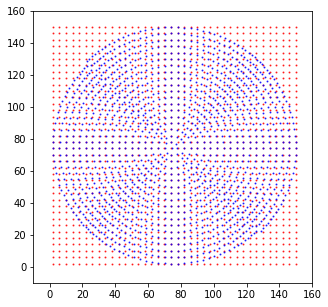

In [72]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

cx=[]
cy=[]
step = 4
for h, w in itertools.product(range(38), repeat=2):
    x = (w + 0.5) * step
    y = (h + 0.5) * step
    cx.append(x)
    cy.append(y)
    
a=75
b=75
cx = np.array(cx)
cy = np.array(cy)
#k =30/np.sqrt((cx-a)**2+(cy-b)**2)#(np.sqrt((cx-a)**2+(cy-b)**2)-30)
k = np.sqrt((cx-a)**2+(cy-b)**2)

#k= np.floor(k/(220-40)*45+40)/k
r=45
maxv = np.fmax(np.abs(cx-75),np.abs(cy-75))
k= maxv/k

cx0 = k*cx+(1-k)*a
cy0 = k*cy+(1-k)*b


#cx0 = []
#cy0 = []
#for x,y in zip(cx,cy):
#    if x<y:
#        cx0.append(np.sqrt(2)/2*(x+75))
#        cy0.append(np.sqrt((y+75)**2-0.5*(x+75)**2))
#    else:
#        cy0.append(np.sqrt(2)/2*(y+75))
#        cx0.append(np.sqrt((x+75)**2-0.5*(y+75)**2))
print(len(cx0),len(k))

plt.figure(figsize=(5, 5))
plt.xlim((-10, 160))
plt.ylim((-10, 160))
plt.scatter(cx, cy, s=1, facecolor='red',alpha=0.75)
plt.scatter(cx0, cy0, s=1, facecolor='blue',alpha=0.75)

## 查看生成框

/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


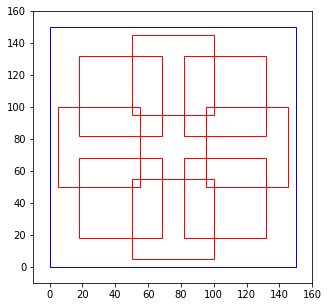

In [157]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

steps =(50,)#(4, 8, 15, 30)# 
box_sizes = (50,)#(2.0, 6.0, 15., 28., 50.)#
aspect_ratios = ((0,), (0,), (0,), (0,))
fm_sizes = (2,)#(38, 19, 10, 5)#

boxes = []
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]
        #s = math.sqrt(self.box_sizes[i] * self.box_sizes[i+1])
        #boxes.append((cx, cy, s, s))
        k = np.sqrt((cx-75)**2+(cy-75)**2)
        k = np.fmax(np.abs(cx-75),np.abs(cy-75))/k*0.9
        cx = k*cx+(1-k)*75-s/2
        cy = k*cy+(1-k)*75-s/2   
        boxes.append((cx, cy, s, s))
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            boxes.append((cx, cy, s * math.sqrt(ar), s / math.sqrt(ar)))
            boxes.append((cx, cy, s / math.sqrt(ar), s * math.sqrt(ar)))

plt.figure(figsize=(5, 5))
plt.xlim((-10, 160))
plt.ylim((-10, 160))

for rect in boxes:
    plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=1,edgecolor='b',facecolor='none'))

#plt.scatter(cx, cy, s=1, facecolor='red',alpha=0.75)
#plt.scatter(cx0, cy0, s=1, facecolor='blue',alpha=0.75)
#print(boxes)

### 正方形

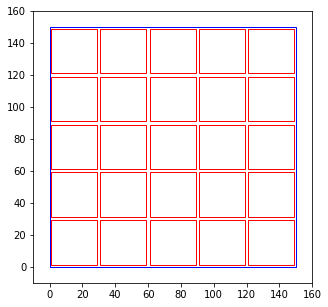

In [262]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95, 7.89, 15, 30, 50)# (30,)#
box_sizes = (4.0, 8.0, 15., 30., 50., 100.)#(28,)#
aspect_ratios = ((0,), (0,), (0,), (0,), (0,))
fm_sizes = (38, 19, 10, 5, 3)#(5,)#

boxes = []
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]

        #k = np.sqrt((cx-75)**2+(cy-75)**2)
        #k = np.fmax(np.abs(cx-75),np.abs(cy-75))/k*0.9
        #cx = k*cx+(1-k)*75-s/2
        #cy = k*cy+(1-k)*75-s/2   
        boxes.append((cx-s/2, cy-s/2, s, s))
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            boxes.append((cx, cy, s * math.sqrt(ar), s / math.sqrt(ar)))
            boxes.append((cx, cy, s / math.sqrt(ar), s * math.sqrt(ar)))

plt.figure(figsize=(5, 5))
plt.xlim((-10, 160))
plt.ylim((-10, 160))

#print(boxes)

for rect in boxes:
    plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=1,edgecolor='b',facecolor='none'))

#plt.scatter(cx, cy, s=1, facecolor='red',alpha=0.75)
#plt.scatter(cx0, cy0, s=1, facecolor='blue',alpha=0.75)
#print(boxes)

### 彩色

/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


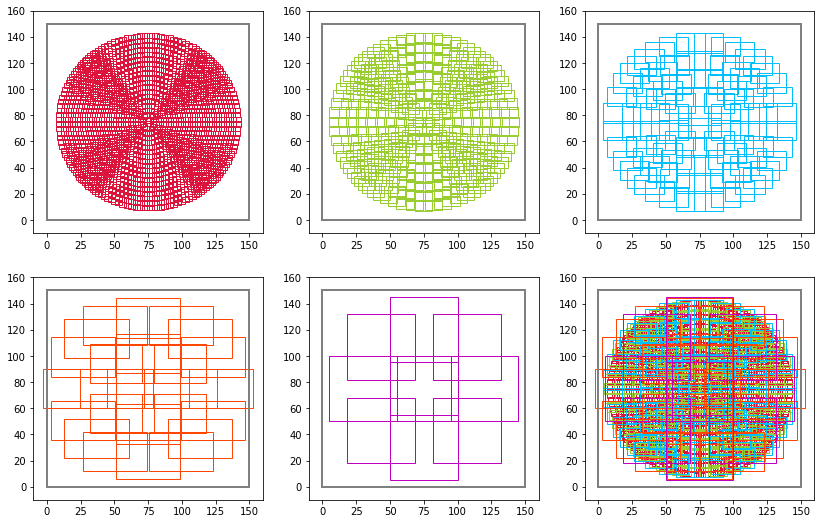

In [261]:
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95, 7.89, 15, 30, 50)# (30,)#
box_sizes = (4.56, 10.09, 18.06, 37.71, 50., 100.)#(28,)#
aspect_ratios = ((1.3,), (1.59,), (1.45,), (1.58,), (1,))
fm_sizes = (38, 19, 10, 5, 3)#(5,)#
color = ('crimson','yellowgreen','deepskyblue','orangered','m')


n = len(steps)
boxes = [[]]*n
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]

        k = np.sqrt((cx-75)**2+(cy-75)**2)
        if k == 0:
            cx = 75
            cy = 75
        else:
            k = np.fmax(np.abs(cx-75),np.abs(cy-75))/k*0.9
            cx = k*cx+(1-k)*75
            cy = k*cy+(1-k)*75 
        
        #boxes[i] = boxes[i] + [(cx-s/2, cy-s/2, s, s)]
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            sw = s * math.sqrt(ar)
            sh = s / math.sqrt(ar)
            boxes[i]=boxes[i]+[(cx-sw/2, cy-sh/2, sw, sh)]

plt.figure(figsize=(14, 9))

for i,boxe in enumerate(boxes):
    for rect in boxe:
        plt.subplot(2,3,i+1)#plt.subplot(411)
        plt.xlim((-10, 160))
        plt.ylim((-10, 160))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))
    for rect in boxe:
        plt.subplot(2,3,6)#plt.subplot(411)
        plt.xlim((-10, 160))
        plt.ylim((-10, 160))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))


### 均匀分布

/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


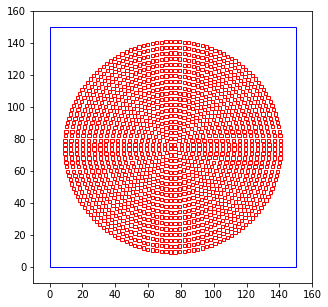

In [311]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95,)#(3.95, 7.89, 15, 30, 50)# 
box_sizes = (2.0,)#(4.0, 8.0, 15., 30., 50., 100.)#
aspect_ratios = ((0,), (0,), (0,), (0,), (0,))
fm_sizes = (38,)#(38, 19, 10, 5, 3)#

boxes = []
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]

        #r = np.sqrt((cx-75)**2+(cy-75)**2)
        cx = cx-75
        cy = cy-75
        r = np.fmax(np.abs(cx),np.abs(cy))    
        if r==0:
            cx = 75
            cy = 75
        else:
            sx = np.nan_to_num(cx/np.abs(cx))
            sy = np.nan_to_num(cy/np.abs(cy))
            k = 0.9
            bx = sx*r*np.cos(np.pi/4)*k
            by = sy*r*np.sin(np.pi/4)*k
            a = np.pi/4*(r-np.fmin(np.abs(cx),np.abs(cy)))/r
            sa = np.nan_to_num((np.abs(cx)-np.abs(cy))/np.abs(np.abs(cx)-np.abs(cy))*(-sx*sy))
            a = sa*a
            cx = bx*np.cos(a)-by*np.sin(a)
            cy = bx*np.sin(a)+by*np.cos(a)

        boxes.append((cx-s/2+75, cy-s/2+75, s, s))
        
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            boxes.append((cx, cy, s * math.sqrt(ar), s / math.sqrt(ar)))
            boxes.append((cx, cy, s / math.sqrt(ar), s * math.sqrt(ar)))

plt.figure(figsize=(5, 5))
plt.xlim((-10, 160))
plt.ylim((-10, 160))

#print(boxes)

for rect in boxes:
    plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=1,edgecolor='b',facecolor='none'))

### 均匀分布多组：

/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


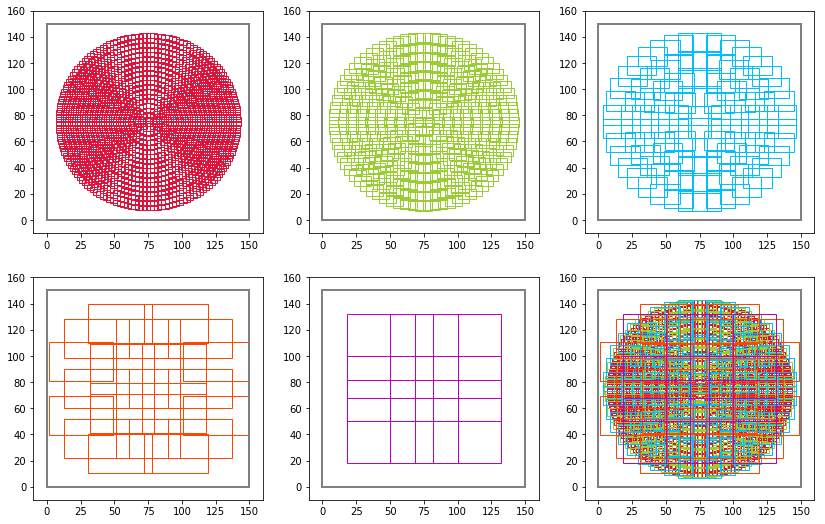

In [310]:
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95, 7.89, 15, 30, 50)# (30,)#
box_sizes = (4.56, 10.09, 18.06, 37.71, 50., 100.)#(28,)#
aspect_ratios = ((1.3,), (1.59,), (1.45,), (1.58,), (1,))
fm_sizes = (38, 19, 10, 5, 3)#(5,)#
color = ('crimson','yellowgreen','deepskyblue','orangered','m')


n = len(steps)
boxes = [[]]*n
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]

        cx = cx-75
        cy = cy-75
        r = np.fmax(np.abs(cx),np.abs(cy))  
        if r==0:
            cx=75
            cy=75
        else:
            sx = np.nan_to_num(cx/np.abs(cx))
            sy = np.nan_to_num(cy/np.abs(cy))
            k = 0.9
            bx = sx*r*np.cos(np.pi/4)*k
            by = sy*r*np.sin(np.pi/4)*k
            a = np.pi/4*(r-np.fmin(np.abs(cx),np.abs(cy)))/r
            sa = np.nan_to_num((np.abs(cx)-np.abs(cy))/np.abs(np.abs(cx)-np.abs(cy))*(-sx*sy))
            a = sa*a
            cx = bx*np.cos(a)-by*np.sin(a)+75
            cy = bx*np.sin(a)+by*np.cos(a)+75
        
        #boxes[i] = boxes[i] + [(cx-s/2, cy-s/2, s, s)]
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            sw = s * math.sqrt(ar)
            sh = s / math.sqrt(ar)
            boxes[i]=boxes[i]+[(cx-sw/2, cy-sh/2, sw, sh)]

plt.figure(figsize=(14, 9))

for i,boxe in enumerate(boxes):
    for rect in boxe:
        plt.subplot(2,3,i+1)#plt.subplot(411)
        plt.xlim((-10, 160))
        plt.ylim((-10, 160))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))
    for rect in boxe:
        plt.subplot(2,3,6)#plt.subplot(411)
        plt.xlim((-10, 160))
        plt.ylim((-10, 160))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))


### 筛选框框：

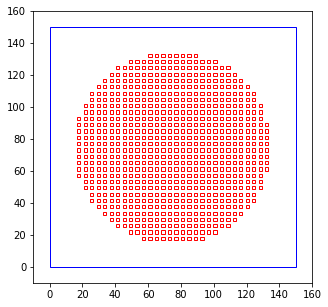

In [313]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95,)#(3.95, 7.89, 15, 30, 50)# 
box_sizes = (2,)#(4.0, 8.0, 15., 30., 50., 100.)#
aspect_ratios = ((0,), (0,), (0,), (0,), (0,))
fm_sizes = (38,)#(38, 19, 10, 5, 3)#

boxes = []
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]

        k = np.sqrt((cx-75)**2+(cy-75)**2)
        #k = np.fmax(np.abs(cx-75),np.abs(cy-75))/k*0.9
        #cx = k*cx+(1-k)*75-s/2
        #cy = k*cy+(1-k)*75-s/2
        if k<=60:
            boxes.append((cx-s/2, cy-s/2, s, s))
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            boxes.append((cx, cy, s * math.sqrt(ar), s / math.sqrt(ar)))
            boxes.append((cx, cy, s / math.sqrt(ar), s * math.sqrt(ar)))

plt.figure(figsize=(5, 5))
plt.xlim((-10, 160))
plt.ylim((-10, 160))

#print(boxes)

for rect in boxes:
    plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=1,edgecolor='b',facecolor='none'))

### 筛选框外膨胀

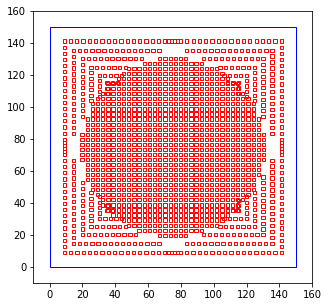

In [375]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95,)#(3.95, 7.89, 15, 30, 50)# 
box_sizes = (2,)#(4.0, 8.0, 15., 30., 50., 100.)#
aspect_ratios = ((0,), (0,), (0,), (0,), (0,))
fm_sizes = (38,)#(38, 19, 10, 5, 3)#

boxes = []
r=70
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]
         
        k = np.sqrt((cx-75)**2+(cy-75)**2)
        if k>r:
            k =1+(np.sqrt(2*np.fmax(np.abs(cx-75),np.abs(cy-75))**2)-r)/r*0.45
            if cx ==75:ax=0
            else:ax=(cx-75)/np.abs(cx-75)
            if cy ==75:ay=0
            else:ay=(cy-75)/np.abs(cy-75)  
            cx = k*cx+(1-k)*75-ax*k*5
            cy = k*cy+(1-k)*75-ay*k*5
            (75-np.abs(cx-75))/75
        
        k = 0.8
        cx = k*cx+(1-k)*75
        cy = k*cy+(1-k)*75
        boxes.append((cx-s/2, cy-s/2, s, s))
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            boxes.append((cx, cy, s * math.sqrt(ar), s / math.sqrt(ar)))
            boxes.append((cx, cy, s / math.sqrt(ar), s * math.sqrt(ar)))

plt.figure(figsize=(5, 5))
plt.xlim((-10, 160))
plt.ylim((-10, 160))

#print(boxes)

for rect in boxes:
    plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=1,edgecolor='b',facecolor='none'))

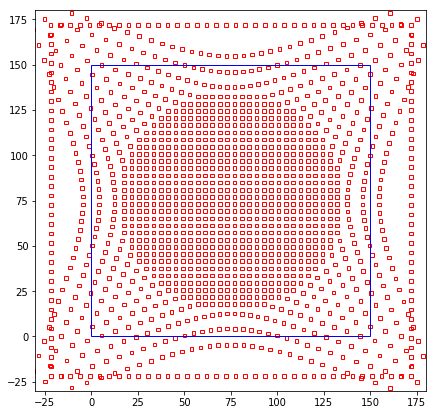

In [403]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95,)#(3.95, 7.89, 15, 30, 50)# 
box_sizes = (2,)#(4.0, 8.0, 15., 30., 50., 100.)#
aspect_ratios = ((0,), (0,), (0,), (0,), (0,))
fm_sizes = (38,)#(38, 19, 10, 5, 3)#

boxes = []
r=60
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]
         

        k = np.sqrt((cx-75)**2+(cy-75)**2)
        if k>r:
            if max(np.abs(cx-75),np.abs(cy-75))>r+10:
                a =1+(np.sqrt(2*np.fmax(np.abs(cx-75),np.abs(cy-75))**2)-r)/r*0.45#1.05#
            else:
                a =1+(k-r)/r
            if max(np.abs(cx-75),np.abs(cy-75))<=r:
                ax=(cx-75)/np.abs(cx-75)
                ay=(cy-75)/np.abs(cy-75)
            else:
                ax=0
                ay=0
            cx = a*cx+(1-a)*75#-ax*3*a*a
            cy = a*cy+(1-a)*75#-ay*3*a*a
        
        boxes.append((cx-s/2, cy-s/2, s, s))
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            boxes.append((cx, cy, s * math.sqrt(ar), s / math.sqrt(ar)))
            boxes.append((cx, cy, s / math.sqrt(ar), s * math.sqrt(ar)))

plt.figure(figsize=(7, 7))
plt.xlim((-30, 180))
plt.ylim((-30, 180))

#print(boxes)

for rect in boxes:
    plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=1,edgecolor='b',facecolor='none'))

#### 均匀分布

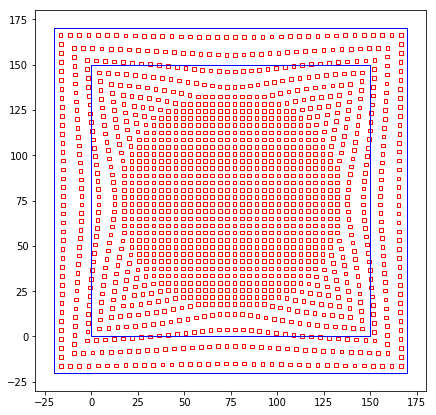

In [423]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95,)#(3.95, 7.89, 15, 30, 50)# 
box_sizes = (2,)#(4.0, 8.0, 15., 30., 50., 100.)#
aspect_ratios = ((0,), (0,), (0,), (0,), (0,))
fm_sizes = (38,)#(38, 19, 10, 5, 3)#

boxes = []
r=60
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]
         

        k = np.sqrt((cx-75)**2+(cy-75)**2)
        if k>r:
            a =1.267#1+(np.sqrt(2*np.fmax(np.abs(cx-75),np.abs(cy-75))**2)-r)/r*0.45#
            d = k*75/max(np.abs(cx-75),np.abs(cy-75))
            al =(k-r)/(d-r)
            a=al*(a-1)+1
            cx = a*cx+(1-a)*75#
            cy = a*cy+(1-a)*75#
        
        boxes.append((cx-s/2, cy-s/2, s, s))
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            boxes.append((cx, cy, s * math.sqrt(ar), s / math.sqrt(ar)))
            boxes.append((cx, cy, s / math.sqrt(ar), s * math.sqrt(ar)))

plt.figure(figsize=(7, 7))
plt.xlim((-30, 180))
plt.ylim((-30, 180))

#print(boxes)

for rect in boxes:
    plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=1,edgecolor='b',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((-20,-20),190,190,linewidth=1,edgecolor='b',facecolor='none'))

#### 所有框框效果

/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


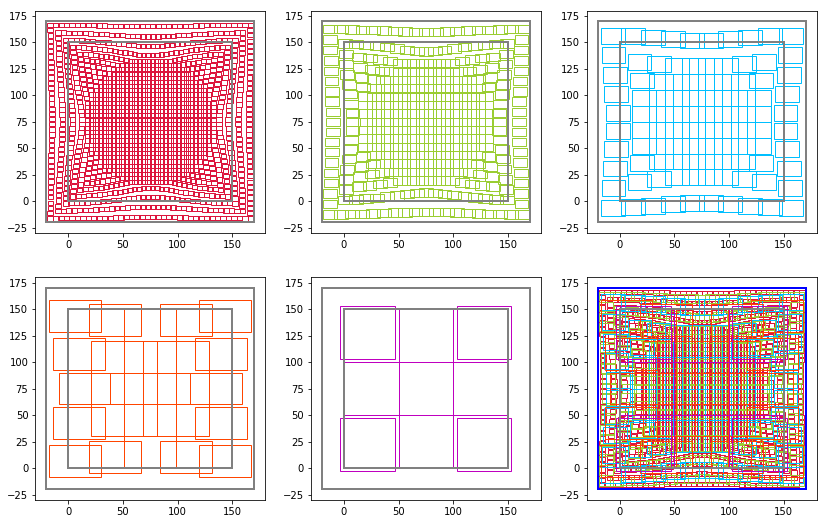

In [427]:
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95, 7.89, 15, 30, 50)# (30,)#
box_sizes = (4.56, 10.09, 18.06, 37.71, 50., 100.)#(28,)#
aspect_ratios = ((1.3,), (1.59,), (1.45,), (1.58,), (1,))
fm_sizes = (38, 19, 10, 5, 3)#(5,)#
color = ('crimson','yellowgreen','deepskyblue','orangered','m')


n = len(steps)
boxes = [[]]*n
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]

        k = np.sqrt((cx-75)**2+(cy-75)**2)
        if k>r:
            a =1.267#1+(np.sqrt(2*np.fmax(np.abs(cx-75),np.abs(cy-75))**2)-r)/r*0.45#
            d = k*75/max(np.abs(cx-75),np.abs(cy-75))
            al =(k-r)/(d-r)
            a=al*(a-1)+1
            cx = a*cx+(1-a)*75#
            cy = a*cy+(1-a)*75#
        
        #boxes[i] = boxes[i] + [(cx-s/2, cy-s/2, s, s)]
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            sw = s * math.sqrt(ar)
            sh = s / math.sqrt(ar)
            boxes[i]=boxes[i]+[(cx-sw/2, cy-sh/2, sw, sh)]

plt.figure(figsize=(14, 9))

for i,boxe in enumerate(boxes):
    for rect in boxe:
        plt.subplot(2,3,i+1)#plt.subplot(411)
        plt.xlim((-30, 180))
        plt.ylim((-30, 180))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((-20,-20),190,190,linewidth=2,edgecolor='gray',facecolor='none'))
    for rect in boxe:
        plt.subplot(2,3,6)#plt.subplot(411)
        plt.xlim((-30, 180))
        plt.ylim((-30, 180))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((-20,-20),190,190,linewidth=2,edgecolor='b',facecolor='none'))


* 限制大小

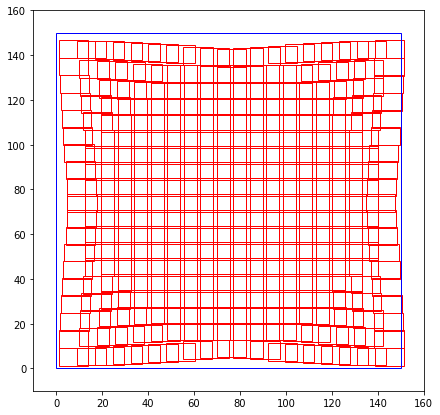

In [457]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

steps =(7.89,)#(3.95, 7.89, 15, 30, 50)# 
box_sizes = (10.09,)#(4.56, 10.09, 18.06, 37.71, 50., 100.)#
aspect_ratios = ((1.59,),(1.3,))#((1.3,), (1.59,), (1.45,), (1.58,), (1,))
fm_sizes = (19,)#(38, 19, 10, 5, 3)#

boxes = []
r=64
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]
         

        b = 0.91
        cx = b*cx+(1-b)*75
        cy = b*cy+(1-b)*75
        
        k = np.sqrt((cx-75)**2+(cy-75)**2)
        if k>r:
            a =1.099#1+(np.sqrt(2*np.fmax(np.abs(cx-75),np.abs(cy-75))**2)-r)/r*0.45#
            d = k*75/max(np.abs(cx-75),np.abs(cy-75))
            al =(k-r)/(d-r)
            a=al*(a-1)+1
            cx = a*cx+(1-a)*75#
            cy = a*cy+(1-a)*75#
        
        #boxes.append((cx-s/2, cy-s/2, s, s))
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            boxes.append((cx-s/2, cy-s/2, s * math.sqrt(ar), s / math.sqrt(ar)))
            #boxes.append((cx, cy, s / math.sqrt(ar), s * math.sqrt(ar)))

plt.figure(figsize=(7, 7))
plt.xlim((-10, 160))
plt.ylim((-10, 160))

#print(boxes)

for rect in boxes:
    plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=1,edgecolor='b',facecolor='none'))
#plt.gca().add_patch(plt.Rectangle((-20,-20),190,190,linewidth=1,edgecolor='b',facecolor='none'))

/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


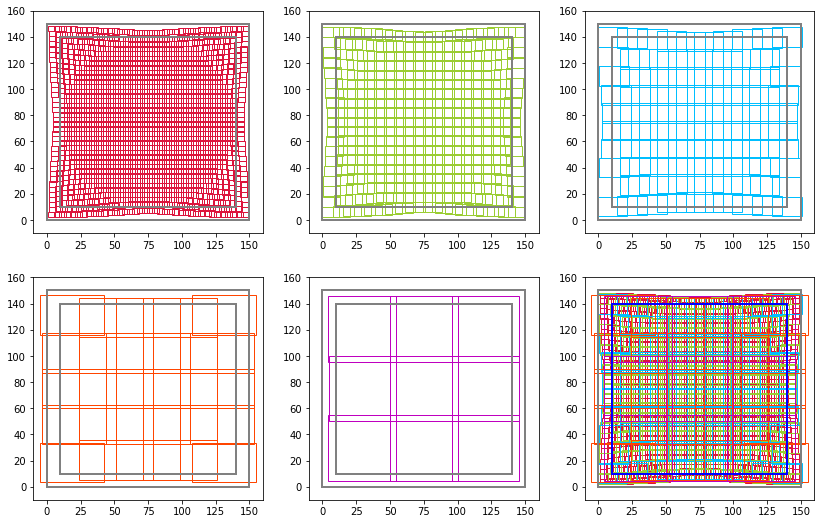

In [460]:
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95, 7.89, 15, 30, 50)# (30,)#
box_sizes = (4.56, 10.09, 18.06, 37.71, 50., 100.)#(28,)#
aspect_ratios = ((1.3,), (1.59,), (1.45,), (1.58,), (1,))
fm_sizes = (38, 19, 10, 5, 3)#(5,)#
color = ('crimson','yellowgreen','deepskyblue','orangered','m')

r=64
n = len(steps)
boxes = [[]]*n
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]

        b = 0.91
        cx = b*cx+(1-b)*75
        cy = b*cy+(1-b)*75
        
        k = np.sqrt((cx-75)**2+(cy-75)**2)
        if k>r:
            a =1.099#
            d = k*75/max(np.abs(cx-75),np.abs(cy-75))
            al =(k-r)/(d-r)
            a=al*(a-1)+1
            cx = a*cx+(1-a)*75#
            cy = a*cy+(1-a)*75#
        
        #boxes[i] = boxes[i] + [(cx-s/2, cy-s/2, s, s)]
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            sw = s * math.sqrt(ar)
            sh = s / math.sqrt(ar)
            boxes[i]=boxes[i]+[(cx-sw/2, cy-sh/2, sw, sh)]

plt.figure(figsize=(14, 9))

for i,boxe in enumerate(boxes):
    for rect in boxe:
        plt.subplot(2,3,i+1)#plt.subplot(411)
        plt.xlim((-10, 160))
        plt.ylim((-10, 160))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((10,10),130,130,linewidth=2,edgecolor='gray',facecolor='none'))
    for rect in boxe:
        plt.subplot(2,3,6)#plt.subplot(411)
        plt.xlim((-10, 160))
        plt.ylim((-10, 160))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((10,10),130,130,linewidth=2,edgecolor='b',facecolor='none'))

#### 框框大小变化

/home/xys/VirtualEnvs/PyTorch/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


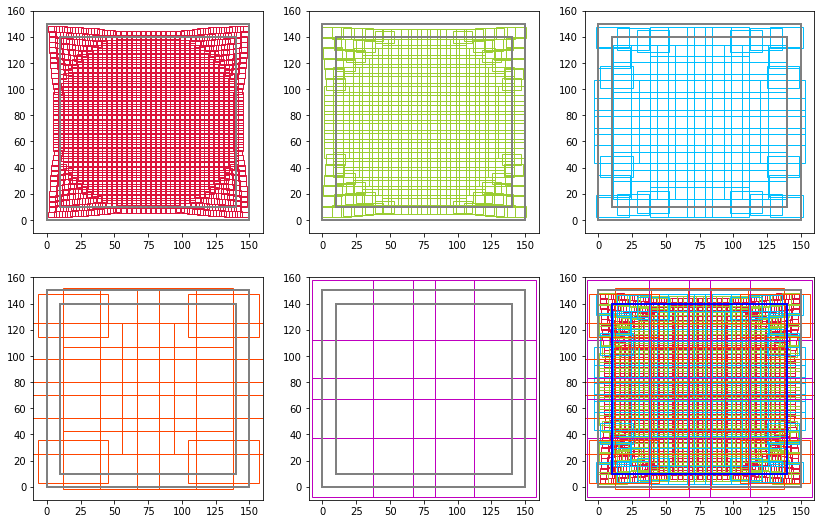

In [469]:
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt

steps =(3.95, 7.89, 15, 30, 50)# (30,)#
box_sizes = (4.56, 10.09, 18.06, 37.71, 50., 100.)#(28,)#
aspect_ratios = ((1.3,), (1.59,), (1.45,), (1.58,), (1,))
fm_sizes = (38, 19, 10, 5, 3)#(5,)#
color = ('crimson','yellowgreen','deepskyblue','orangered','m')

r=70
n = len(steps)
boxes = [[]]*n
for i, fm_size in enumerate(fm_sizes):
    for h, w in itertools.product(range(fm_size), repeat=2):
        cx = (w + 0.5) * steps[i]
        cy = (h + 0.5) * steps[i]
        s = box_sizes[i]

        b = 0.91
        cx = b*cx+(1-b)*75
        cy = b*cy+(1-b)*75
        rb = 1.5
        
        k = np.sqrt((cx-75)**2+(cy-75)**2)
        if k>r:
            a =1.099#
            d = k*75/max(np.abs(cx-75),np.abs(cy-75))
            al =(k-r)/(d-r)
            a=al*(a-1)+1
            cx = a*cx+(1-a)*75#
            cy = a*cy+(1-a)*75#
            rb = 1.1
        
        #boxes[i] = boxes[i] + [(cx-s/2, cy-s/2, s, s)]
        #s = self.box_sizes[i]
        for ar in aspect_ratios[i]:
            if ar==0: continue
            sw = s * math.sqrt(ar)*rb
            sh = s / math.sqrt(ar)*rb
            boxes[i]=boxes[i]+[(cx-sw/2, cy-sh/2, sw, sh)]

plt.figure(figsize=(14, 9))

for i,boxe in enumerate(boxes):
    for rect in boxe:
        plt.subplot(2,3,i+1)#plt.subplot(411)
        plt.xlim((-10, 160))
        plt.ylim((-10, 160))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((10,10),130,130,linewidth=2,edgecolor='gray',facecolor='none'))
    for rect in boxe:
        plt.subplot(2,3,6)#plt.subplot(411)
        plt.xlim((-10, 160))
        plt.ylim((-10, 160))
        plt.gca().add_patch(plt.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor=color[i],facecolor='none'))
plt.gca().add_patch(plt.Rectangle((0,0),150,150,linewidth=2,edgecolor='gray',facecolor='none'))
plt.gca().add_patch(plt.Rectangle((10,10),130,130,linewidth=2,edgecolor='b',facecolor='none'))

## 模型调试

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from models.dsod import DSOD
#from ModelsDesign.box_coder import SSDBoxCoder

net =DSOD(num_classes=4)

x = torch.randn(8,3,150,150)
y = net(x)
#print(x.size())
#print(y[0].size(),y[1].size())

0 torch.Size([8, 3, 150, 150])
1 torch.Size([8, 144, 75, 75])
2 torch.Size([8, 528, 75, 75])
3 torch.Size([8, 528, 75, 75])
4 torch.Size([8, 528, 38, 38])
5 torch.Size([8, 264, 19, 19])
6 torch.Size([8, 264, 10, 10])
7 torch.Size([8, 132, 5, 5])
